<a href="https://colab.research.google.com/github/cheersbuddy/Dataset_Analysis/blob/main/IMU_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALIGN GUARD INTERNSHIP TASK**
IMU Dataset Analysis

**Created By: TEAM A**

* Sowimya
* Fyzil
* Girish
* C Ananda Krishnan
* Blessy Louis
* Shree Rohit

**Created on:** 12-06-2024



---



# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Load CSV Files of Vicon device IMU readings

In [ ]:
# Read CSV files into DataFrames without headers
Vdf_61 = pd.read_csv('/content/Session_61_Sensor_5.csv', header=None)
Vdf_66 = pd.read_csv('/content/Session_66_Sensor_5.csv', header=None)
Vdf_70 = pd.read_csv('/content/Session_70_Sensor_5.csv', header=None)
Vdf_73 = pd.read_csv('/content/Session_73_Sensor_5.csv', header=None)
Vdf_75 = pd.read_csv('/content/Session_75_Sensor_5.csv', header=None)
Vdf_77 = pd.read_csv('/content/Session_77_Sensor_5.csv', header=None)
Vdf_79 = pd.read_csv('/content/Session_79_Sensor_5.csv', header=None)
Vdf_83 = pd.read_csv('/content/Session_83_Sensor_5.csv', header=None)
Vdf_85 = pd.read_csv('/content/Session_85_Sensor_5.csv', header=None)


Load CSV Files of Kinect device IMU readings

In [ ]:
Kdf_812 = pd.read_csv('/content/Session_812_Sensor_9.csv', header=None)
Kdf_813 = pd.read_csv('/content/Session_813_Sensor_9_cal.csv', header=None)
Kdf_811 = pd.read_csv('/content/Session_811_Sensor_9.csv', header=None)
Kdf_809 = pd.read_csv('/content/Session_809_Sensor_9.csv', header=None)
Kdf_808 = pd.read_csv('/content/Session_808_Sensor_9part2.csv', header=None)
Kdf_807 = pd.read_csv('/content/Session_807_Sensor_9part1.csv', header=None)
Kdf_806 = pd.read_csv('/content/Session_806_Sensor_9Cal.csv', header=None)


Shape of each file in Vicon

In [ ]:
# Print the shape of each DataFrame to verify
print("Shape of Kdf_812:", Kdf_812.shape)
print("Shape of Kdf_813:", Kdf_813.shape)
print("Shape of Kdf_811:", Kdf_811.shape)
print("Shape of Kdf_809:", Kdf_809.shape)
print("Shape of Kdf_808:", Kdf_808.shape)
print("Shape of Kdf_807:", Kdf_807.shape)
print("Shape of Kdf_806:", Kdf_806.shape)

Shape of Kdf_812: (47911, 10)
Shape of Kdf_813: (13269, 10)
Shape of Kdf_811: (18347, 10)
Shape of Kdf_809: (22551, 10)
Shape of Kdf_808: (11289, 10)
Shape of Kdf_807: (12495, 10)
Shape of Kdf_806: (72047, 10)


Shape of Each file in Kinect

In [ ]:
print("Shape of Vdf_61:", Vdf_61.shape)
print("Shape of Vdf_66:", Vdf_66.shape)
print("Shape of Vdf_70:", Vdf_70.shape)
print("Shape of Vdf_73:", Vdf_73.shape)
print("Shape of Vdf_75:", Vdf_75.shape)
print("Shape of Vdf_77:", Vdf_77.shape)
print("Shape of Vdf_79:", Vdf_79.shape)
print("Shape of Vdf_83:", Vdf_83.shape)
print("Shape of Vdf_85:", Vdf_85.shape)

Shape of Vdf_61: (19758, 10)
Shape of Vdf_66: (25161, 10)
Shape of Vdf_70: (21979, 10)
Shape of Vdf_73: (16503, 10)
Shape of Vdf_75: (15837, 10)
Shape of Vdf_77: (21017, 10)
Shape of Vdf_79: (21017, 10)
Shape of Vdf_83: (20276, 10)
Shape of Vdf_85: (26418, 10)


Combining Dataframes of Vicon

In [ ]:
# List of DataFrames to be concatenated
dataframes = [Vdf_61, Vdf_66, Vdf_70, Vdf_73, Vdf_75, Vdf_77, Vdf_79, Vdf_83, Vdf_85]

# Concatenate all DataFrames in the list
Vcomb_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
print(Vcomb_df.shape)

(187966, 10)


Combining Dataframes Of Kinect

In [ ]:
# List of DataFrames to be concatenated
dataframes_k = [Kdf_812, Kdf_813, Kdf_811, Kdf_809, Kdf_808, Kdf_807, Kdf_806]

# Concatenate all DataFrames row-wise
Kcomb_df = pd.concat(dataframes_k, ignore_index=True)

# Display the shape of the combined DataFrame
print("Combined DataFrame shape:", Kcomb_df.shape)
print(Kcomb_df.shape)

Combined DataFrame shape: (197909, 10)
(197909, 10)


Droping the 10th  coloumn because there is no information about that, and adding headings to the dataframe

In [ ]:
# Drop the 10th column (index 9)
Vcomb_df = Vcomb_df.drop(columns=9)
Kcomb_df = Kcomb_df.drop(columns=9)

# Add headers
headers = [
    "Accelerometer_x", "Accelerometer_y", "Accelerometer_Z",
    "Gyroscope_X", "Gyroscope_Y", "Gyroscope_Z",
    "Magnetometer_X", "Magnetometer_Y", "Magnetometer_Z"
]

Vcomb_df.columns = headers
Kcomb_df.columns = headers


print("Data Frame of Vicon\n",Vcomb_df.head())


print("Data Frame of Kinect\n",Kcomb_df.head())


Data Frame of Vicon
    Accelerometer_x  Accelerometer_y  Accelerometer_Z  Gyroscope_X  \
0         0.820996        -0.261035        -0.529102     6.613159   
1         0.808008        -0.272363        -0.542041     7.409668   
2         0.794971        -0.282764        -0.555762     7.763672   
3         0.783350        -0.291846        -0.571484     7.644653   
4         0.772168        -0.298584        -0.589063     6.878662   

   Gyroscope_Y  Gyroscope_Z  Magnetometer_X  Magnetometer_Y  Magnetometer_Z  
0     3.369141   -10.397339       -2.021484       144.05273       -9.345703  
1     2.947998   -11.715698       -2.285156       143.96484       -8.730469  
2     2.780151   -12.918091       -2.548828       143.87695       -8.115234  
3     2.664185   -13.891602       -2.812500       143.78906       -7.500000  
4     2.377319   -14.755249       -3.076172       143.70117       -6.884766  
Data Frame of Kinect
    Accelerometer_x  Accelerometer_y  Accelerometer_Z  Gyroscope_X  \
0    

# EDA

In [ ]:
print("Data Types of Vicon\n", Vcomb_df.dtypes)
print("Data Types of Kinect\n", Kcomb_df.dtypes)

Data Types of Vicon
 Accelerometer_x    float64
Accelerometer_y    float64
Accelerometer_Z    float64
Gyroscope_X        float64
Gyroscope_Y        float64
Gyroscope_Z        float64
Magnetometer_X     float64
Magnetometer_Y     float64
Magnetometer_Z     float64
dtype: object
Data Types of Kinect
 Accelerometer_x    float64
Accelerometer_y    float64
Accelerometer_Z    float64
Gyroscope_X        float64
Gyroscope_Y        float64
Gyroscope_Z        float64
Magnetometer_X     float64
Magnetometer_Y     float64
Magnetometer_Z     float64
dtype: object


In [ ]:
print(Vcomb_df.info())
print(Kcomb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187966 entries, 0 to 187965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Accelerometer_x  187966 non-null  float64
 1   Accelerometer_y  187966 non-null  float64
 2   Accelerometer_Z  187966 non-null  float64
 3   Gyroscope_X      187966 non-null  float64
 4   Gyroscope_Y      187966 non-null  float64
 5   Gyroscope_Z      187966 non-null  float64
 6   Magnetometer_X   187966 non-null  float64
 7   Magnetometer_Y   187966 non-null  float64
 8   Magnetometer_Z   187966 non-null  float64
dtypes: float64(9)
memory usage: 12.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197909 entries, 0 to 197908
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Accelerometer_x  197909 non-null  float64
 1   Accelerometer_y  197909 non-null  float64
 2   Accelerometer_Z  197909 

In [ ]:
print(Vcomb_df.describe())
print(Kcomb_df.describe())

       Accelerometer_x  Accelerometer_y  Accelerometer_Z    Gyroscope_X  \
count    187966.000000    187966.000000    187966.000000  187966.000000   
mean          0.535504        -0.257881        -0.485898      -2.369796   
std           0.466030         0.395378         0.298169      23.896332   
min          -0.956396        -1.046338        -1.093262    -935.967900   
25%           0.126611        -0.555212        -0.721533      -5.538940   
50%           0.745361        -0.228711        -0.394922      -1.406860   
75%           0.949707        -0.044287        -0.241553       2.774048   
max           1.682031         1.041602         0.678955     318.493650   

         Gyroscope_Y    Gyroscope_Z  Magnetometer_X  Magnetometer_Y  \
count  187966.000000  187966.000000   187966.000000   187966.000000   
mean       -1.289973     -12.539146       -9.539636      135.250194   
std        29.522719      32.676859       43.432322       21.941456   
min      -508.654800    -775.787300    -

Checking for null values

In [ ]:
print(Vcomb_df.isnull().sum())
print(Kcomb_df.isnull().sum())

Accelerometer_x    0
Accelerometer_y    0
Accelerometer_Z    0
Gyroscope_X        0
Gyroscope_Y        0
Gyroscope_Z        0
Magnetometer_X     0
Magnetometer_Y     0
Magnetometer_Z     0
dtype: int64
Accelerometer_x    0
Accelerometer_y    0
Accelerometer_Z    0
Gyroscope_X        0
Gyroscope_Y        0
Gyroscope_Z        0
Magnetometer_X     0
Magnetometer_Y     0
Magnetometer_Z     0
dtype: int64


Checking for Duplicates

In [ ]:
print(Vcomb_df.duplicated().sum())
print(Kcomb_df.duplicated().sum())

0
958


Removing Duplicates

In [ ]:
# Drop duplicate rows in Kcomb_df
Kcomb_df = Kcomb_df.drop_duplicates()

Checking for outliers

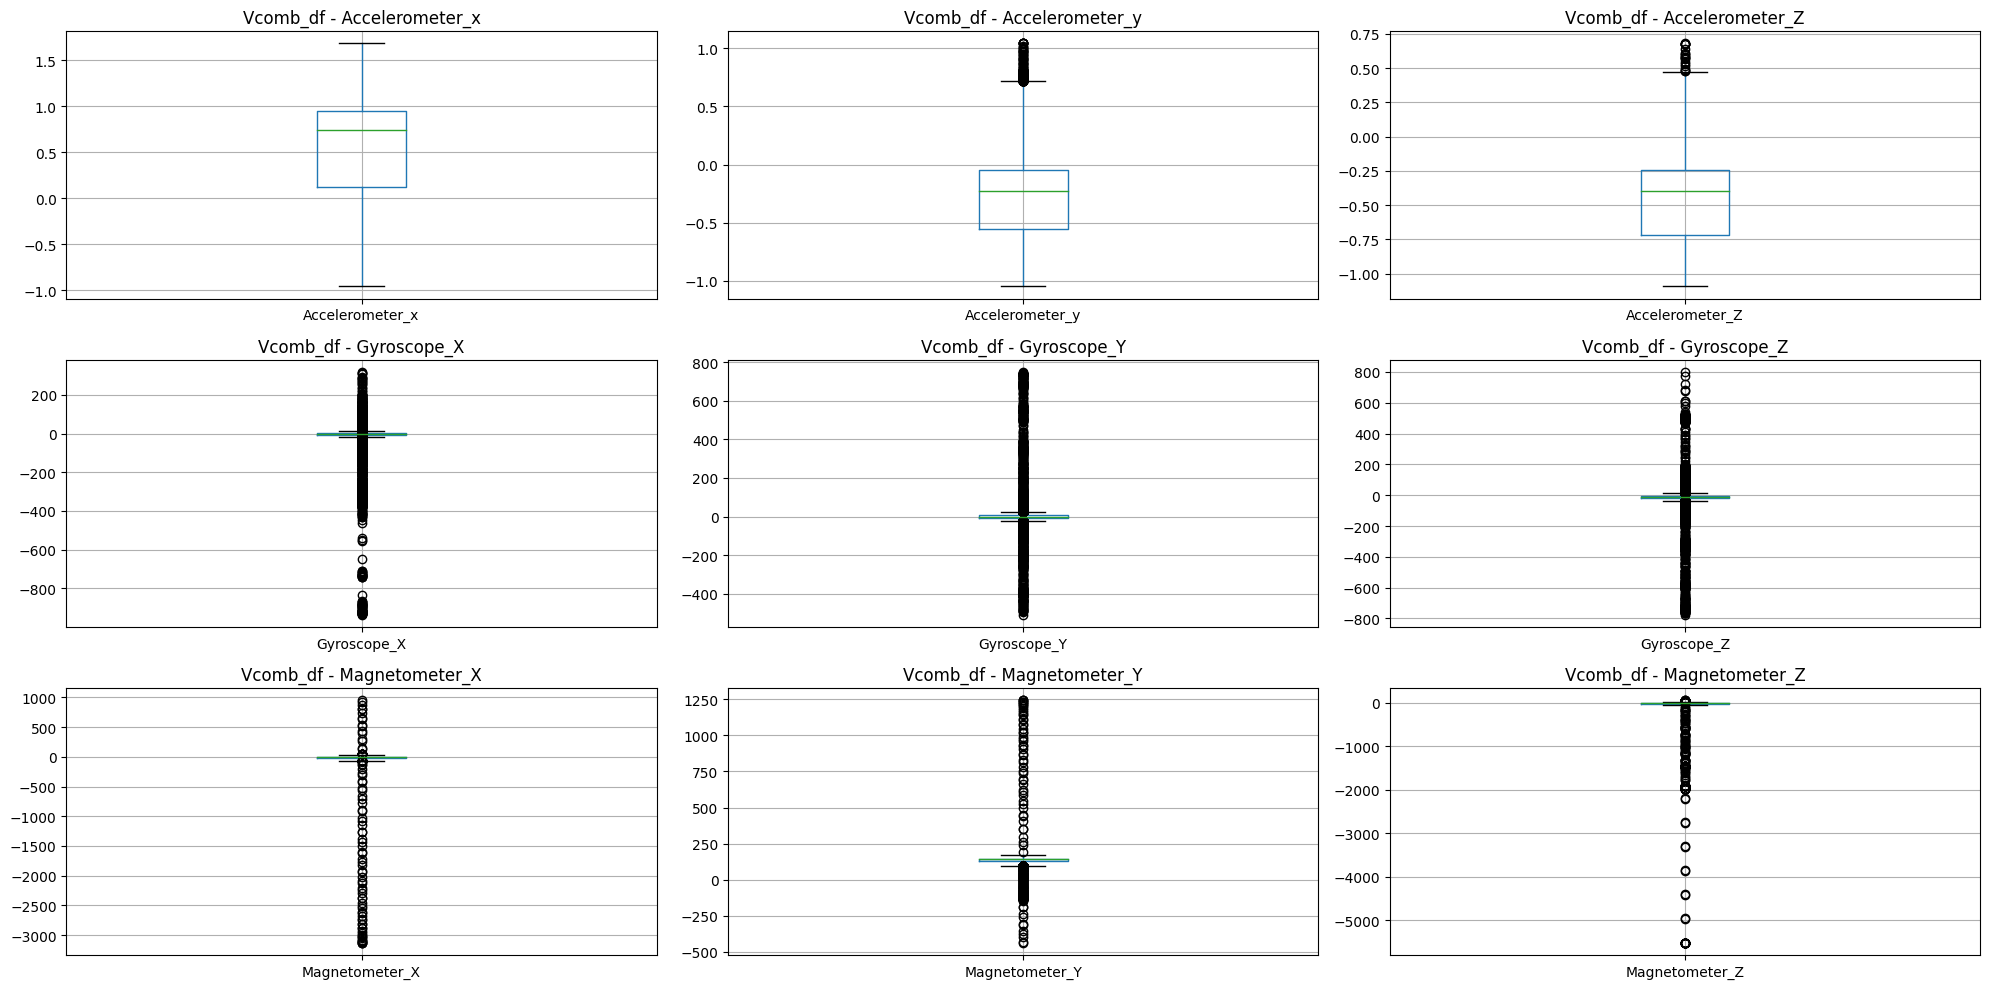

In [ ]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(Vcomb_df.columns, 1):
    plt.subplot(3, 3, i)
    Vcomb_df.boxplot(column=column)
    plt.title(f"Vcomb_df - {column}")

plt.tight_layout()
plt.show()

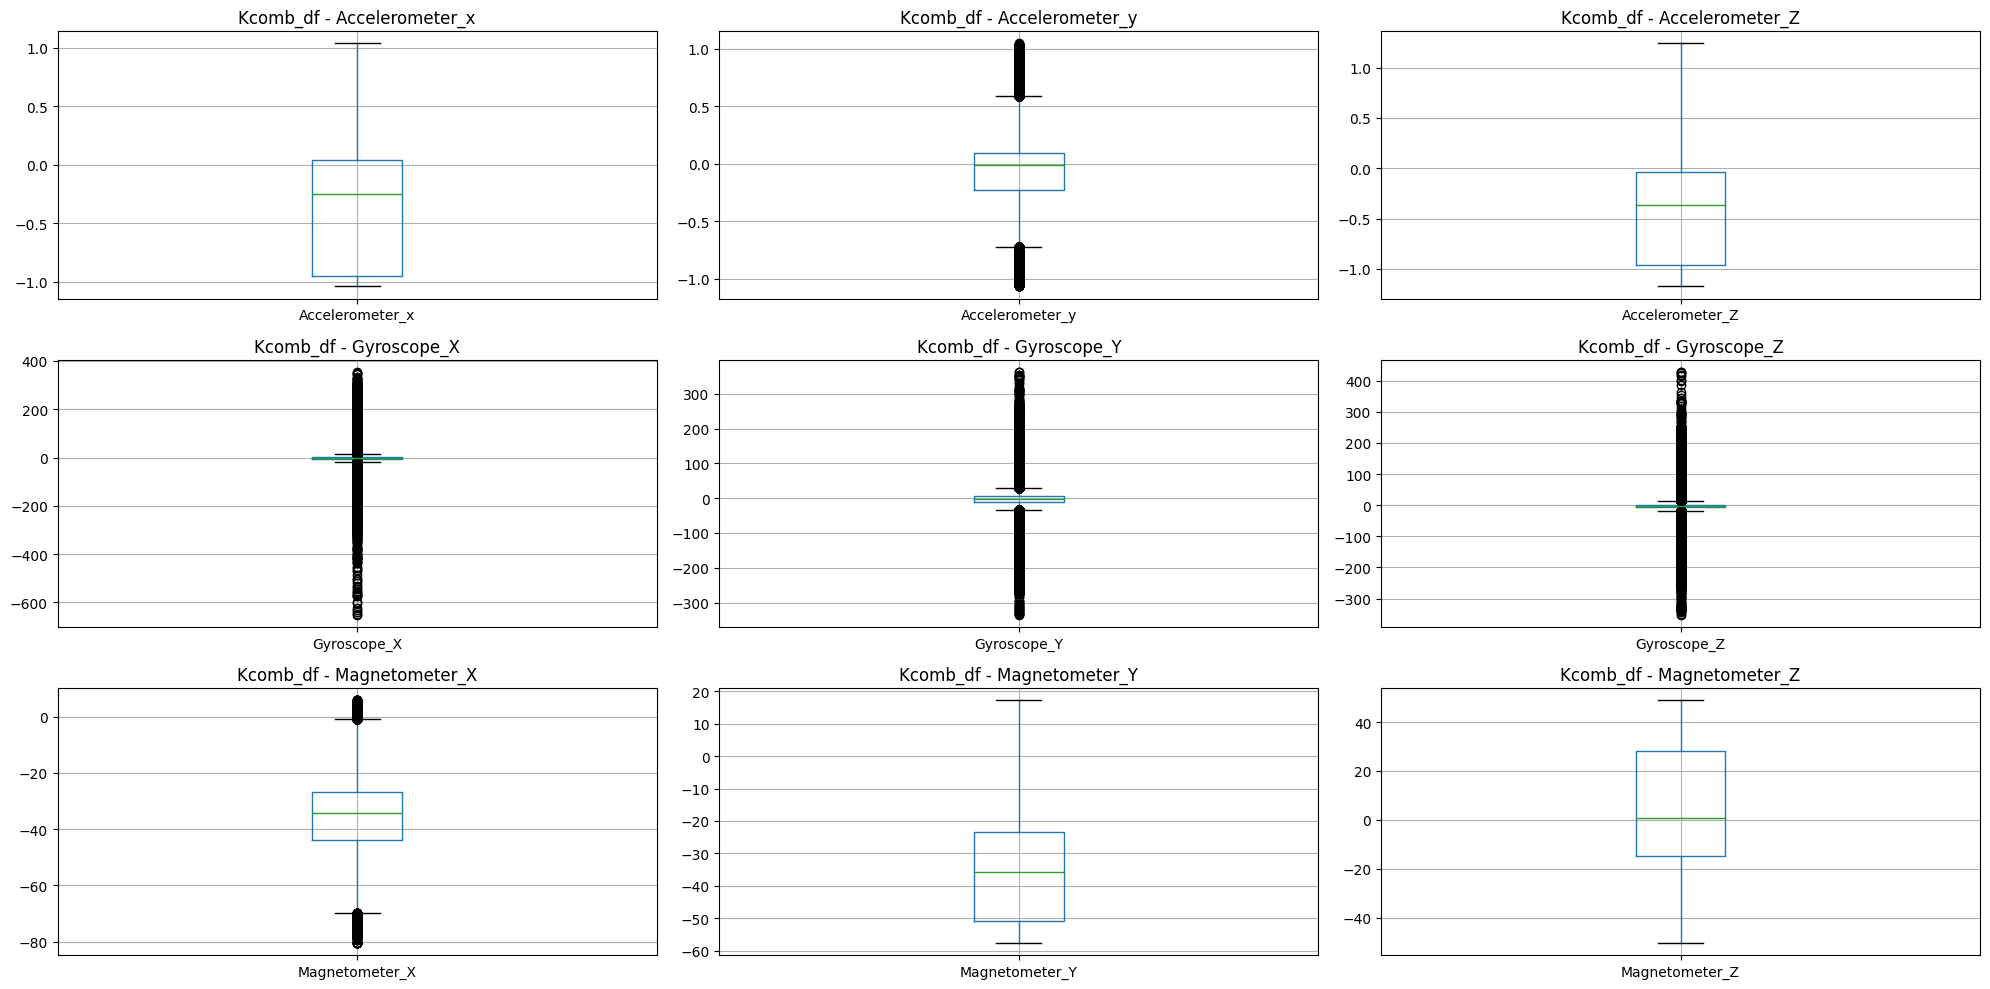

In [ ]:
# Plot box plots for each column in Kcomb_df
plt.figure(figsize=(20, 10))
for i, column in enumerate(Kcomb_df.columns, 1):
    plt.subplot(3, 3, i)
    Kcomb_df.boxplot(column=column)
    plt.title(f"Kcomb_df - {column}")

plt.tight_layout()
plt.show()

Taking the count of outliers , to decide if to drop them

In [ ]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

# Calculate number of outliers for each column in Vcomb_df
Vcomb_outliers = count_outliers(Vcomb_df)
print("Number of outliers in each column of Vcomb_df:")
for column, count in Vcomb_outliers.items():
    print(f"{column}: {count}")

# Calculate number of outliers for each column in Kcomb_df
Kcomb_outliers = count_outliers(Kcomb_df)
print("Number of outliers in each column of Kcomb_df:")
for column, count in Kcomb_outliers.items():
    print(f"{column}: {count}")

Number of outliers in each column of Vcomb_df:
Accelerometer_x: 0
Accelerometer_y: 1906
Accelerometer_Z: 21
Gyroscope_X: 26272
Gyroscope_Y: 37532
Gyroscope_Z: 36876
Magnetometer_X: 127
Magnetometer_Y: 3392
Magnetometer_Z: 450
Number of outliers in each column of Kcomb_df:
Accelerometer_x: 0
Accelerometer_y: 17660
Accelerometer_Z: 0
Gyroscope_X: 51226
Gyroscope_Y: 28917
Gyroscope_Z: 45107
Magnetometer_X: 2710
Magnetometer_Y: 0
Magnetometer_Z: 0


# **Handling Outliers**

In [ ]:
import pandas as pd

# Function to handle outliers
def handle_outliers(df):
    for column in df.columns:
        if df[column].count() < 10000:
            # Calculate the median value for the column
            median_value = df[column].median()
            # Replace outliers with the median value
            df[column] = df[column].apply(lambda x: median_value if (x < df[column].quantile(0.25)) or (x > df[column].quantile(0.75)) else x)
    return df

# Handle outliers for Vcomb_df
Vcomb_df_handled = handle_outliers(Vcomb_df)

# Handle outliers for Kcomb_df
Kcomb_df_handled = handle_outliers(Kcomb_df)

# Calculate the number of outliers for the handled DataFrames
Vcomb_outliers_handled = count_outliers(Vcomb_df_handled)
Kcomb_outliers_handled = count_outliers(Kcomb_df_handled)

# Print the number of outliers after handling
print("Number of outliers in each column of Vcomb_df after handling:")
for column, count in Vcomb_outliers_handled.items():
    print(f"{column}: {count}")

print("Number of outliers in each column of Kcomb_df after handling:")
for column, count in Kcomb_outliers_handled.items():
    print(f"{column}: {count}")


Number of outliers in each column of Vcomb_df after handling:
Accelerometer_x: 0
Accelerometer_y: 1906
Accelerometer_Z: 21
Gyroscope_X: 26272
Gyroscope_Y: 37532
Gyroscope_Z: 36876
Magnetometer_X: 127
Magnetometer_Y: 3392
Magnetometer_Z: 450
Number of outliers in each column of Kcomb_df after handling:
Accelerometer_x: 0
Accelerometer_y: 17660
Accelerometer_Z: 0
Gyroscope_X: 51226
Gyroscope_Y: 28917
Gyroscope_Z: 45107
Magnetometer_X: 2710
Magnetometer_Y: 0
Magnetometer_Z: 0


# Winsorizing:

> Add Winsorizing limits extreme values in the data to reduce the effect of possibly spurious outliers.



In [ ]:
#  winsorizing
from scipy.stats.mstats import winsorize

def winsorize_series(series):
    return winsorize(series, limits=[0.05, 0.05])

Vcomb_df_winsorized = Vcomb_df.apply(winsorize_series)
Kcomb_df_winsorized = Kcomb_df.apply(winsorize_series)


# outliers changed after using winsorize

In [ ]:


# Calculate the number of outliers for the winsorized DataFrames
Vcomb_outliers_winsorized = count_outliers(Vcomb_df_winsorized)
Kcomb_outliers_winsorized = count_outliers(Kcomb_df_winsorized)

# Print the number of outliers after winsorizing
print("Number of outliers in each column of Vcomb_df after winsorizing:")
for column, count in Vcomb_outliers_winsorized.items():
    print(f"{column}: {count}")

print("Number of outliers in each column of Kcomb_df after winsorizing:")
for column, count in Kcomb_outliers_winsorized.items():
    print(f"{column}: {count}")


Number of outliers in each column of Vcomb_df after winsorizing:
Accelerometer_x: 0
Accelerometer_y: 0
Accelerometer_Z: 0
Gyroscope_X: 26272
Gyroscope_Y: 37532
Gyroscope_Z: 36876
Magnetometer_X: 0
Magnetometer_Y: 0
Magnetometer_Z: 0
Number of outliers in each column of Kcomb_df after winsorizing:
Accelerometer_x: 0
Accelerometer_y: 10340
Accelerometer_Z: 0
Gyroscope_X: 51226
Gyroscope_Y: 28917
Gyroscope_Z: 45107
Magnetometer_X: 0
Magnetometer_Y: 0
Magnetometer_Z: 0


# Clipping


> Add Clipping the outliers to a specific range.



In [ ]:
# using clip_outliers
def clip_outliers(df, lower_quantile=0.05, upper_quantile=0.95):
    for column in df.columns:
        lower_bound = df[column].quantile(lower_quantile)
        upper_bound = df[column].quantile(upper_quantile)
        df[column] = df[column].clip(lower_bound, upper_bound)
    return df

Vcomb_df_clipped = clip_outliers(Vcomb_df.copy())
Kcomb_df_clipped = clip_outliers(Kcomb_df.copy())


outliers changed after using clip_outliers

In [ ]:
# outliers changed after using clip_outliers

Vcomb_outliers_clipped = count_outliers(Vcomb_df_clipped)
Kcomb_outliers_clipped = count_outliers(Kcomb_df_clipped)

print("Number of outliers in each column of Vcomb_df after clipping:")
for column, count in Vcomb_outliers_clipped.items():
    print(f"{column}: {count}")

print("Number of outliers in each column of Kcomb_df after clipping:")
for column, count in Kcomb_outliers_clipped.items():
    print(f"{column}: {count}")


Number of outliers in each column of Vcomb_df after clipping:
Accelerometer_x: 0
Accelerometer_y: 0
Accelerometer_Z: 0
Gyroscope_X: 26272
Gyroscope_Y: 37532
Gyroscope_Z: 36876
Magnetometer_X: 0
Magnetometer_Y: 0
Magnetometer_Z: 0
Number of outliers in each column of Kcomb_df after clipping:
Accelerometer_x: 0
Accelerometer_y: 10340
Accelerometer_Z: 0
Gyroscope_X: 51226
Gyroscope_Y: 28917
Gyroscope_Z: 45107
Magnetometer_X: 0
Magnetometer_Y: 0
Magnetometer_Z: 0


In [ ]:
# Function to count outliers as before
def count_outliers(df):
    outlier_counts = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

# Applying transformations and counting outliers
transformations = {
    'Winsorization': (Vcomb_df_winsorized, Kcomb_df_winsorized),
    'Clipping': (Vcomb_df_clipped, Kcomb_df_clipped)
}

for method, (V_df, K_df) in transformations.items():
    V_outliers = count_outliers(V_df)
    K_outliers = count_outliers(K_df)
    print(f"Number of outliers in each column of Vcomb_df after {method}:")
    for column, count in V_outliers.items():
        print(f"{column}: {count}")
    print(f"Number of outliers in each column of Kcomb_df after {method}:")
    for column, count in K_outliers.items():
        print(f"{column}: {count}")


Number of outliers in each column of Vcomb_df after Winsorization:
Accelerometer_x: 0
Accelerometer_y: 0
Accelerometer_Z: 0
Gyroscope_X: 26272
Gyroscope_Y: 37532
Gyroscope_Z: 36876
Magnetometer_X: 0
Magnetometer_Y: 0
Magnetometer_Z: 0
Number of outliers in each column of Kcomb_df after Winsorization:
Accelerometer_x: 0
Accelerometer_y: 10340
Accelerometer_Z: 0
Gyroscope_X: 51226
Gyroscope_Y: 28917
Gyroscope_Z: 45107
Magnetometer_X: 0
Magnetometer_Y: 0
Magnetometer_Z: 0
Number of outliers in each column of Vcomb_df after Clipping:
Accelerometer_x: 0
Accelerometer_y: 0
Accelerometer_Z: 0
Gyroscope_X: 26272
Gyroscope_Y: 37532
Gyroscope_Z: 36876
Magnetometer_X: 0
Magnetometer_Y: 0
Magnetometer_Z: 0
Number of outliers in each column of Kcomb_df after Clipping:
Accelerometer_x: 0
Accelerometer_y: 10340
Accelerometer_Z: 0
Gyroscope_X: 51226
Gyroscope_Y: 28917
Gyroscope_Z: 45107
Magnetometer_X: 0
Magnetometer_Y: 0
Magnetometer_Z: 0


# **Skewness**
Apply power transformation

In [ ]:
def power_transform(series, exponent):
    return np.power(series, exponent)

# Apply power transformation
def apply_power_transformation(df, exponent=0.5):
    transformed_df = df.apply(lambda x: power_transform(x, exponent))
    return transformed_df

# Apply and count outliers for Vcomb_df and Kcomb_df
Vcomb_df_power = apply_power_transformation(Vcomb_df)
Kcomb_df_power = apply_power_transformation(Kcomb_df)

Vcomb_outliers_power = count_outliers(Vcomb_df_power)
Kcomb_outliers_power = count_outliers(Kcomb_df_power)

print("Number of outliers in each column of Vcomb_df after Power Transformation:")
for column, count in Vcomb_outliers_power.items():
    print(f"{column}: {count}")

print("Number of outliers in each column of Kcomb_df after Power Transformation:")
for column, count in Kcomb_outliers_power.items():
    print(f"{column}: {count}")

Number of outliers in each column of Vcomb_df after Power Transformation:
Accelerometer_x: 6670
Accelerometer_y: 0
Accelerometer_Z: 44
Gyroscope_X: 1218
Gyroscope_Y: 477
Gyroscope_Z: 332
Magnetometer_X: 28
Magnetometer_Y: 3456
Magnetometer_Z: 1441
Number of outliers in each column of Kcomb_df after Power Transformation:
Accelerometer_x: 0
Accelerometer_y: 10730
Accelerometer_Z: 0
Gyroscope_X: 3039
Gyroscope_Y: 6432
Gyroscope_Z: 3240
Magnetometer_X: 0
Magnetometer_Y: 733
Magnetometer_Z: 2679


# Apply quantile transformation

In [ ]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Apply quantile transformation
def apply_quantile_transformation(df, output_distribution='normal'):
    transformer = QuantileTransformer(output_distribution=output_distribution, random_state=0)
    transformed_data = transformer.fit_transform(df)
    transformed_df = pd.DataFrame(transformed_data, columns=df.columns)
    return transformed_df

# Apply and count outliers for Vcomb_df and Kcomb_df
Vcomb_df_quantile = apply_quantile_transformation(Vcomb_df)
Kcomb_df_quantile = apply_quantile_transformation(Kcomb_df)

# Calculate skewness for Vcomb_df_quantile
Vcomb_skewness_quantile = Vcomb_df_quantile.apply(skew)

# Calculate skewness for Kcomb_df_quantile
Kcomb_skewness_quantile = Kcomb_df_quantile.apply(skew)

# Print skewness values for Vcomb_df_quantile
print("Skewness values for Vcomb_df_quantile:")
print(Vcomb_skewness_quantile)

# Print skewness values for Kcomb_df_quantile
print("\nSkewness values for Kcomb_df_quantile:")
print(Kcomb_skewness_quantile)



Skewness values for Vcomb_df_quantile:
Accelerometer_x   -0.006018
Accelerometer_y   -0.028863
Accelerometer_Z    0.003973
Gyroscope_X       -0.042270
Gyroscope_Y       -0.023556
Gyroscope_Z        0.023926
Magnetometer_X     0.029155
Magnetometer_Y    -0.012031
Magnetometer_Z    -0.028283
dtype: float64

Skewness values for Kcomb_df_quantile:
Accelerometer_x    0.007574
Accelerometer_y   -0.023323
Accelerometer_Z   -0.028152
Gyroscope_X        0.003352
Gyroscope_Y       -0.008246
Gyroscope_Z       -0.067461
Magnetometer_X    -0.002095
Magnetometer_Y     0.021932
Magnetometer_Z    -0.002850
dtype: float64


# visualization before making winsorizing, power andQuantile Transformation for Vcomb_df and Kcomb_df

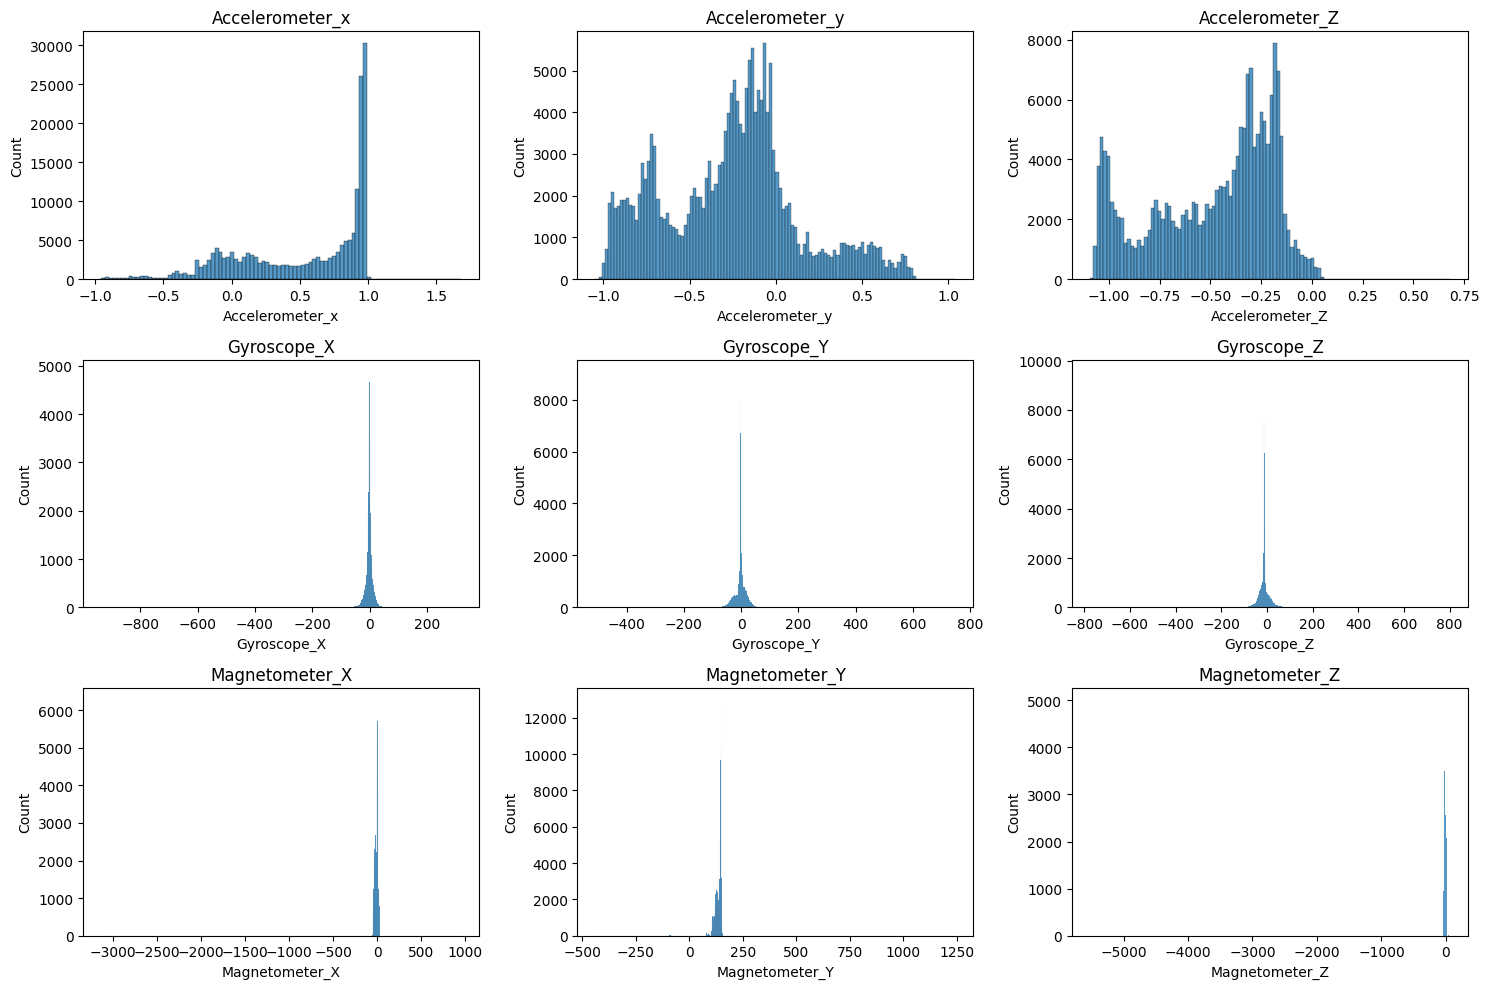

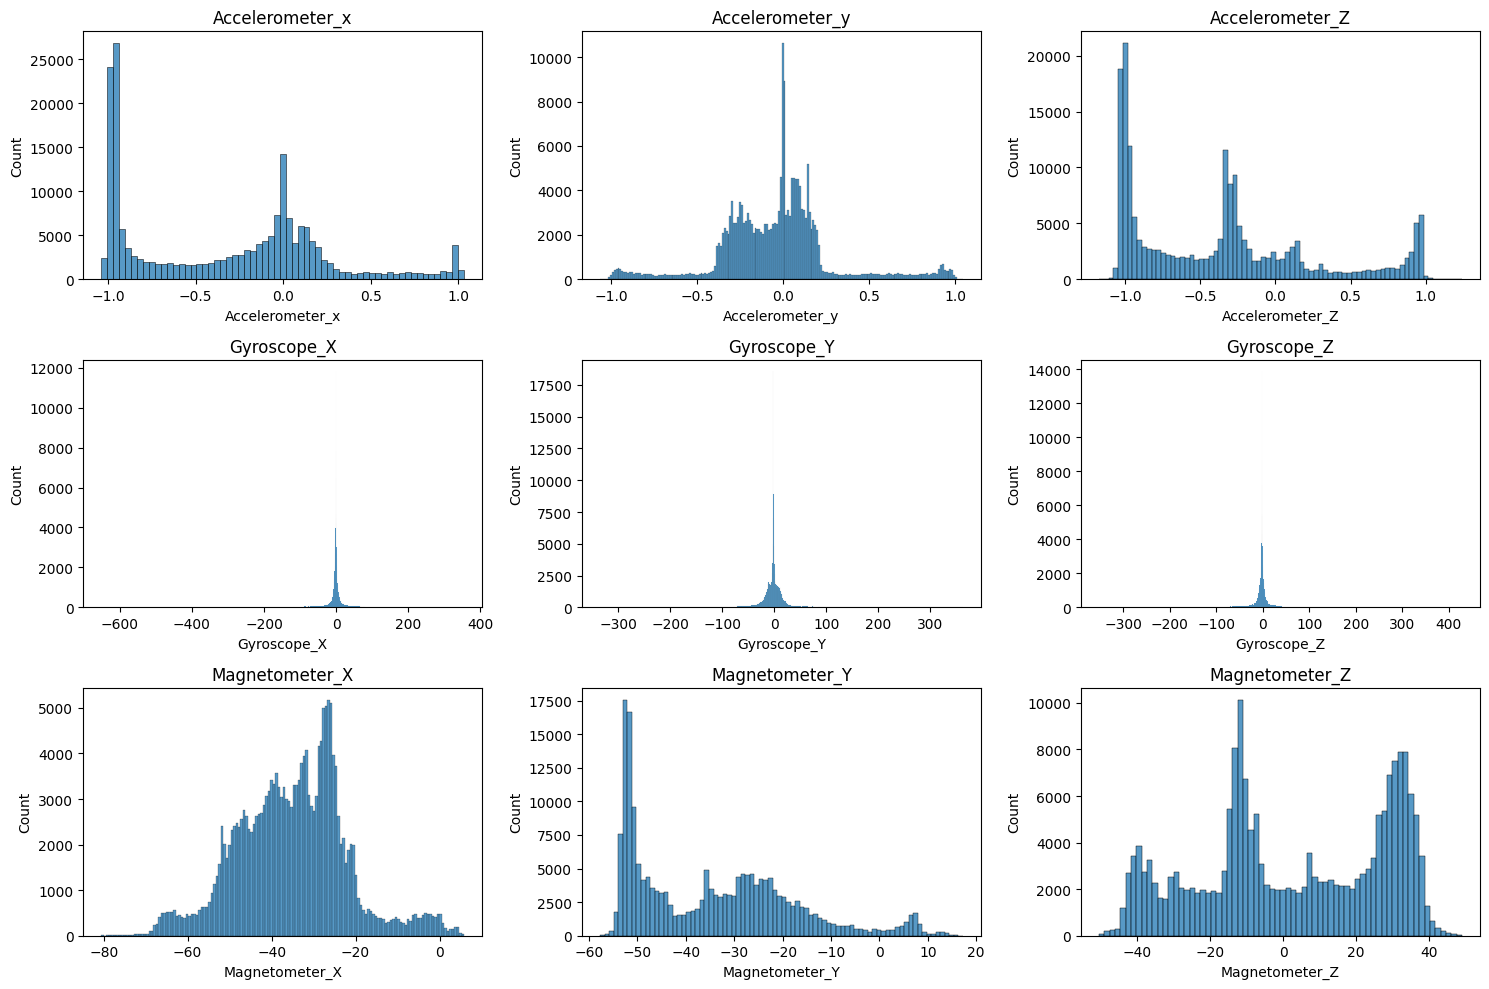

In [ ]:
#  visualization before making winsorizing, power andQuantile Transformation for Vcomb_df and Kcomb_df

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Loop through columns and plot histograms
for i, column in enumerate(Vcomb_df.columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(Vcomb_df[column], ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

# Repeat the same process for Kcomb_df
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(Kcomb_df.columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(Kcomb_df[column], ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()


# visualization after making power andQuantile Transformation for Vcomb_df and Kcomb_df

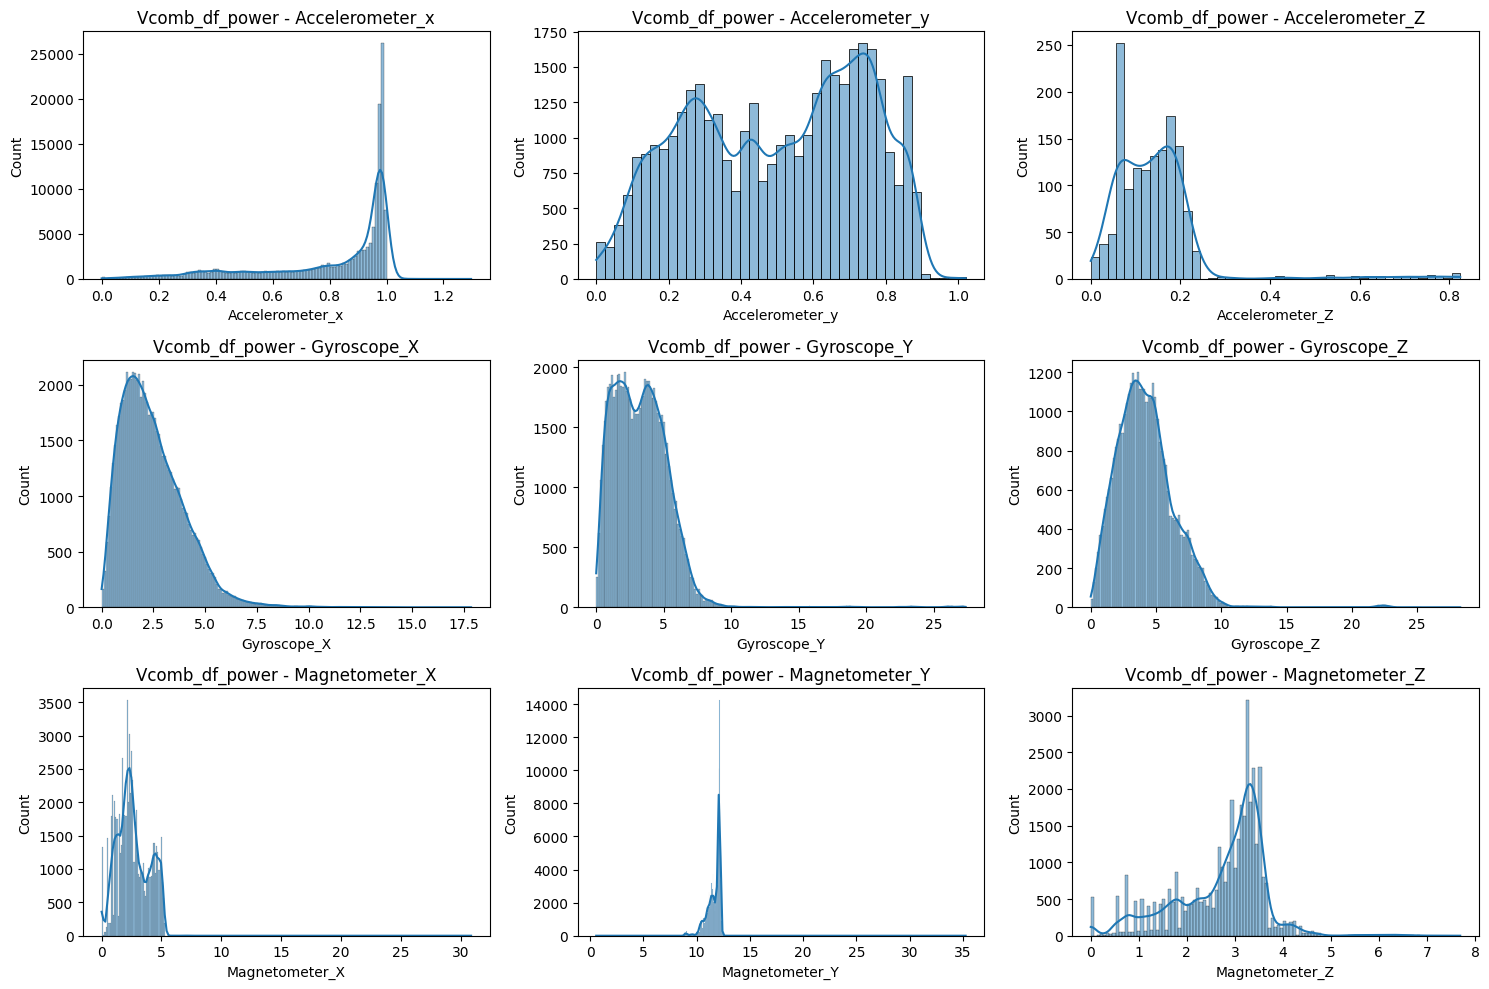

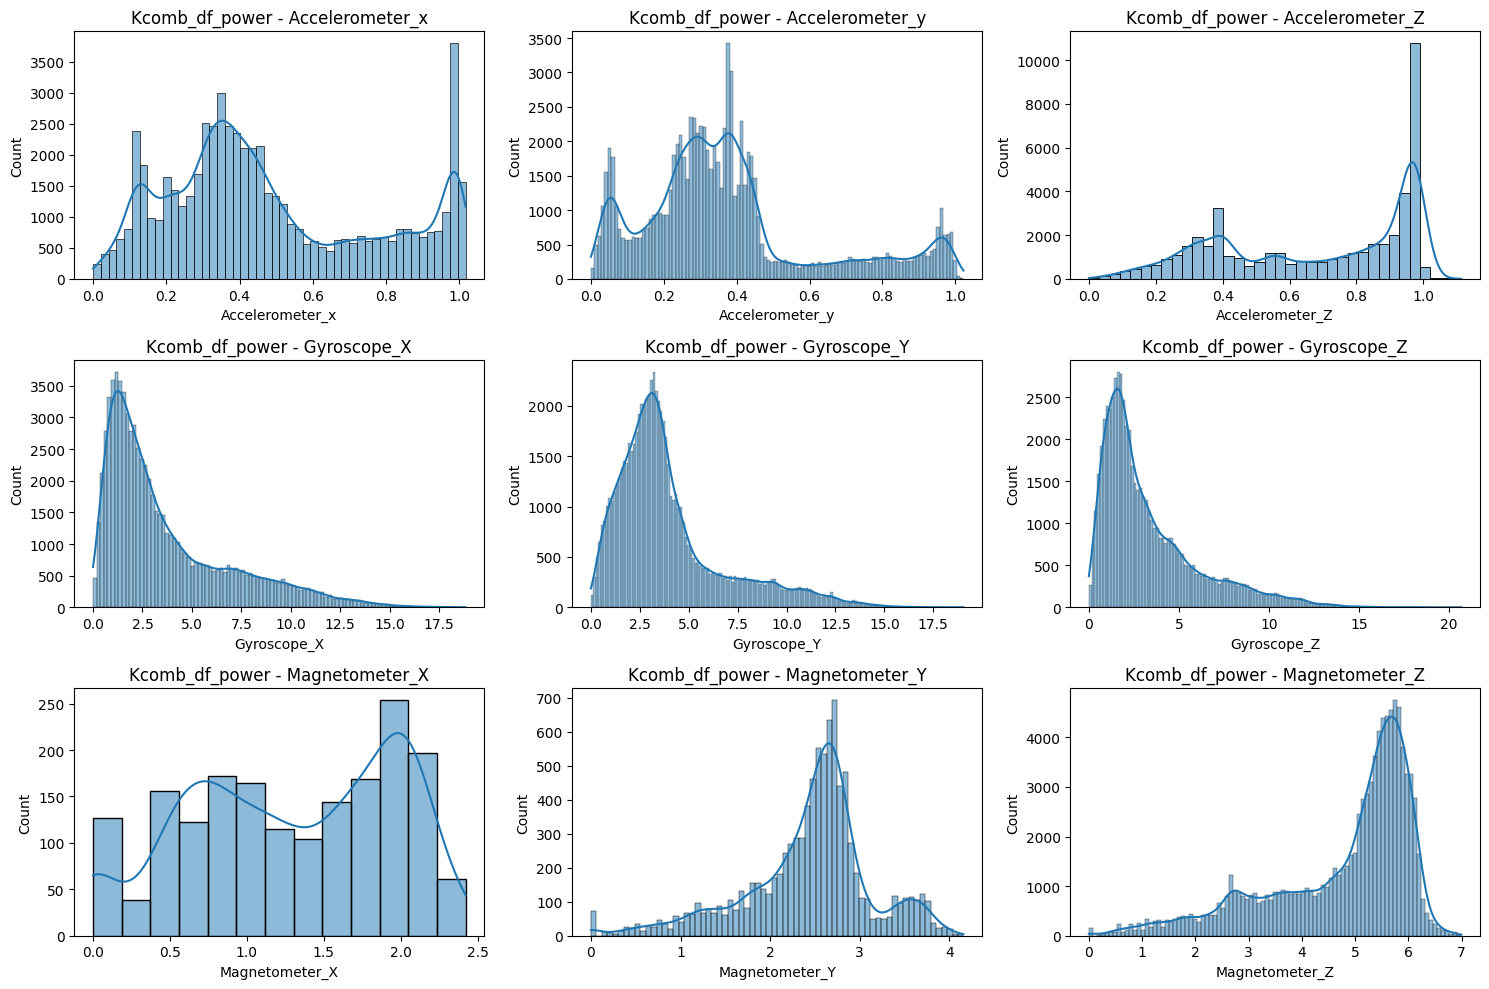

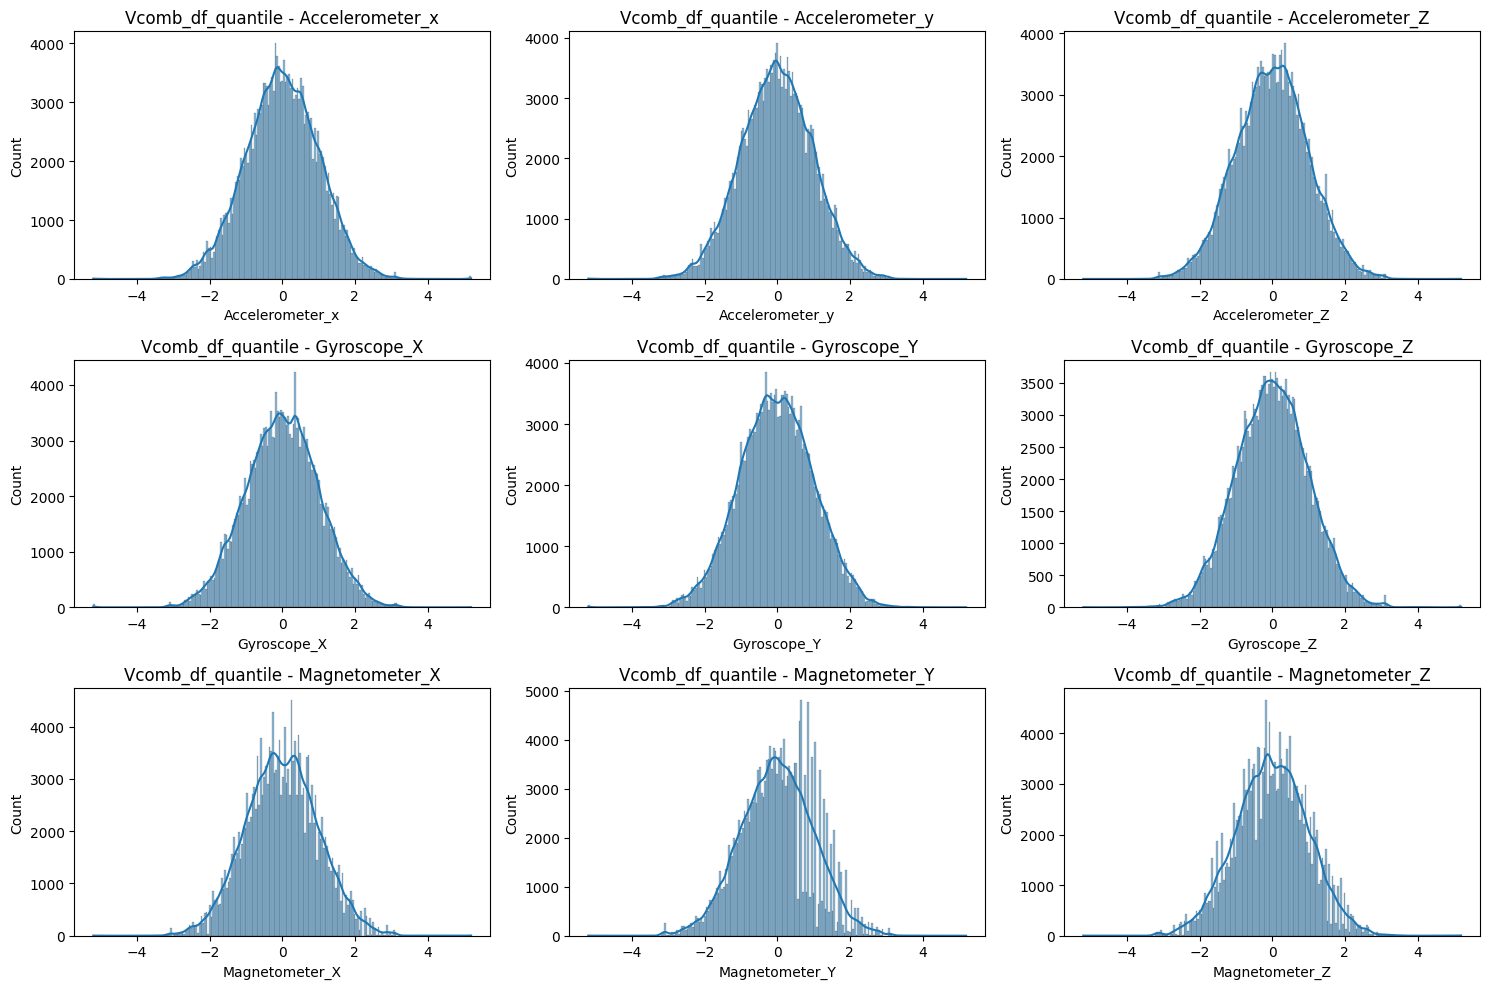

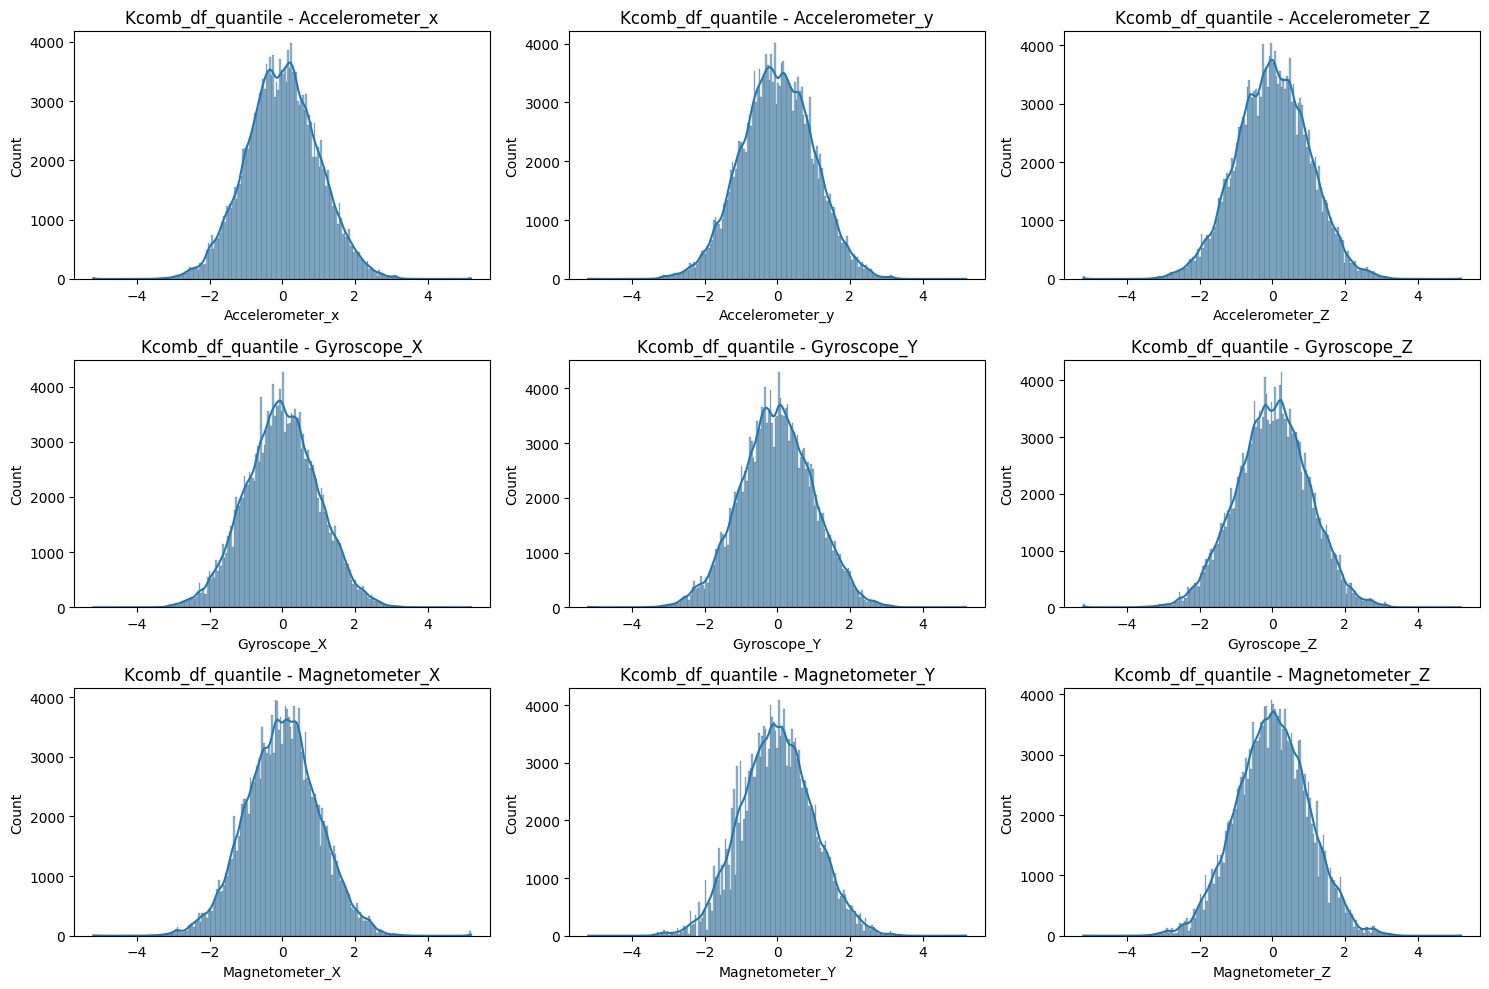

In [ ]:
#  visualization after making power andQuantile Transformation for Vcomb_df and Kcomb_df

import matplotlib.pyplot as plt

# Plot the distribution of each column after power transformation for Vcomb_df
plt.figure(figsize=(15, 10))
for i, column in enumerate(Vcomb_df_power.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(Vcomb_df_power[column], kde=True)
    plt.title(f"Vcomb_df_power - {column}")

plt.tight_layout()
plt.show()

# Plot the distribution of each column after power transformation for Kcomb_df
plt.figure(figsize=(15, 10))
for i, column in enumerate(Kcomb_df_power.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(Kcomb_df_power[column], kde=True)
    plt.title(f"Kcomb_df_power - {column}")

plt.tight_layout()
plt.show()

# Plot the distribution of each column after quantile transformation for Vcomb_df
plt.figure(figsize=(15, 10))
for i, column in enumerate(Vcomb_df_quantile.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(Vcomb_df_quantile[column], kde=True)
    plt.title(f"Vcomb_df_quantile - {column}")

plt.tight_layout()
plt.show()

# Plot the distribution of each column after quantile transformation for Kcomb_df
plt.figure(figsize=(15, 10))
for i, column in enumerate(Kcomb_df_quantile.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(Kcomb_df_quantile[column], kde=True)
    plt.title(f"Kcomb_df_quantile - {column}")

plt.tight_layout()
plt.show()


# Final Skewness

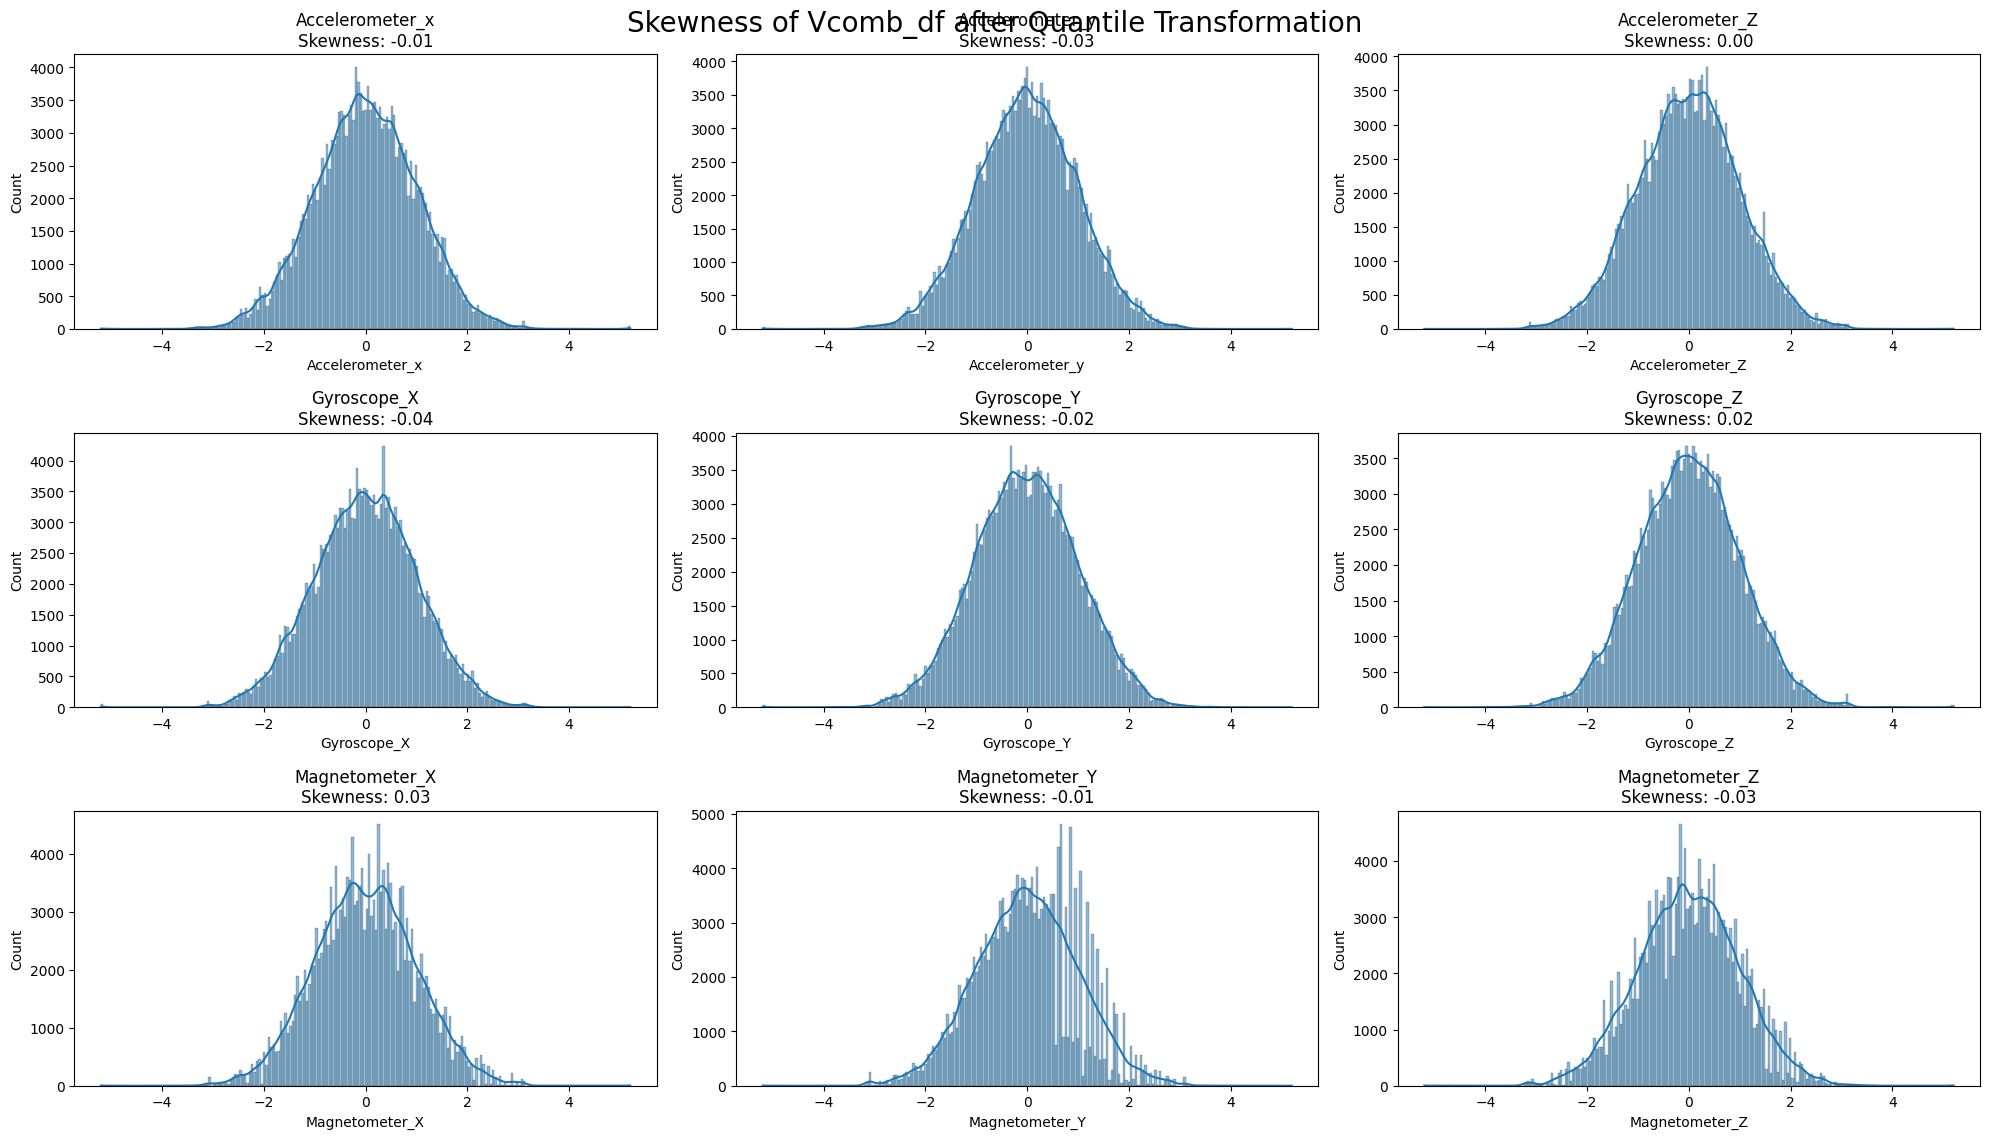

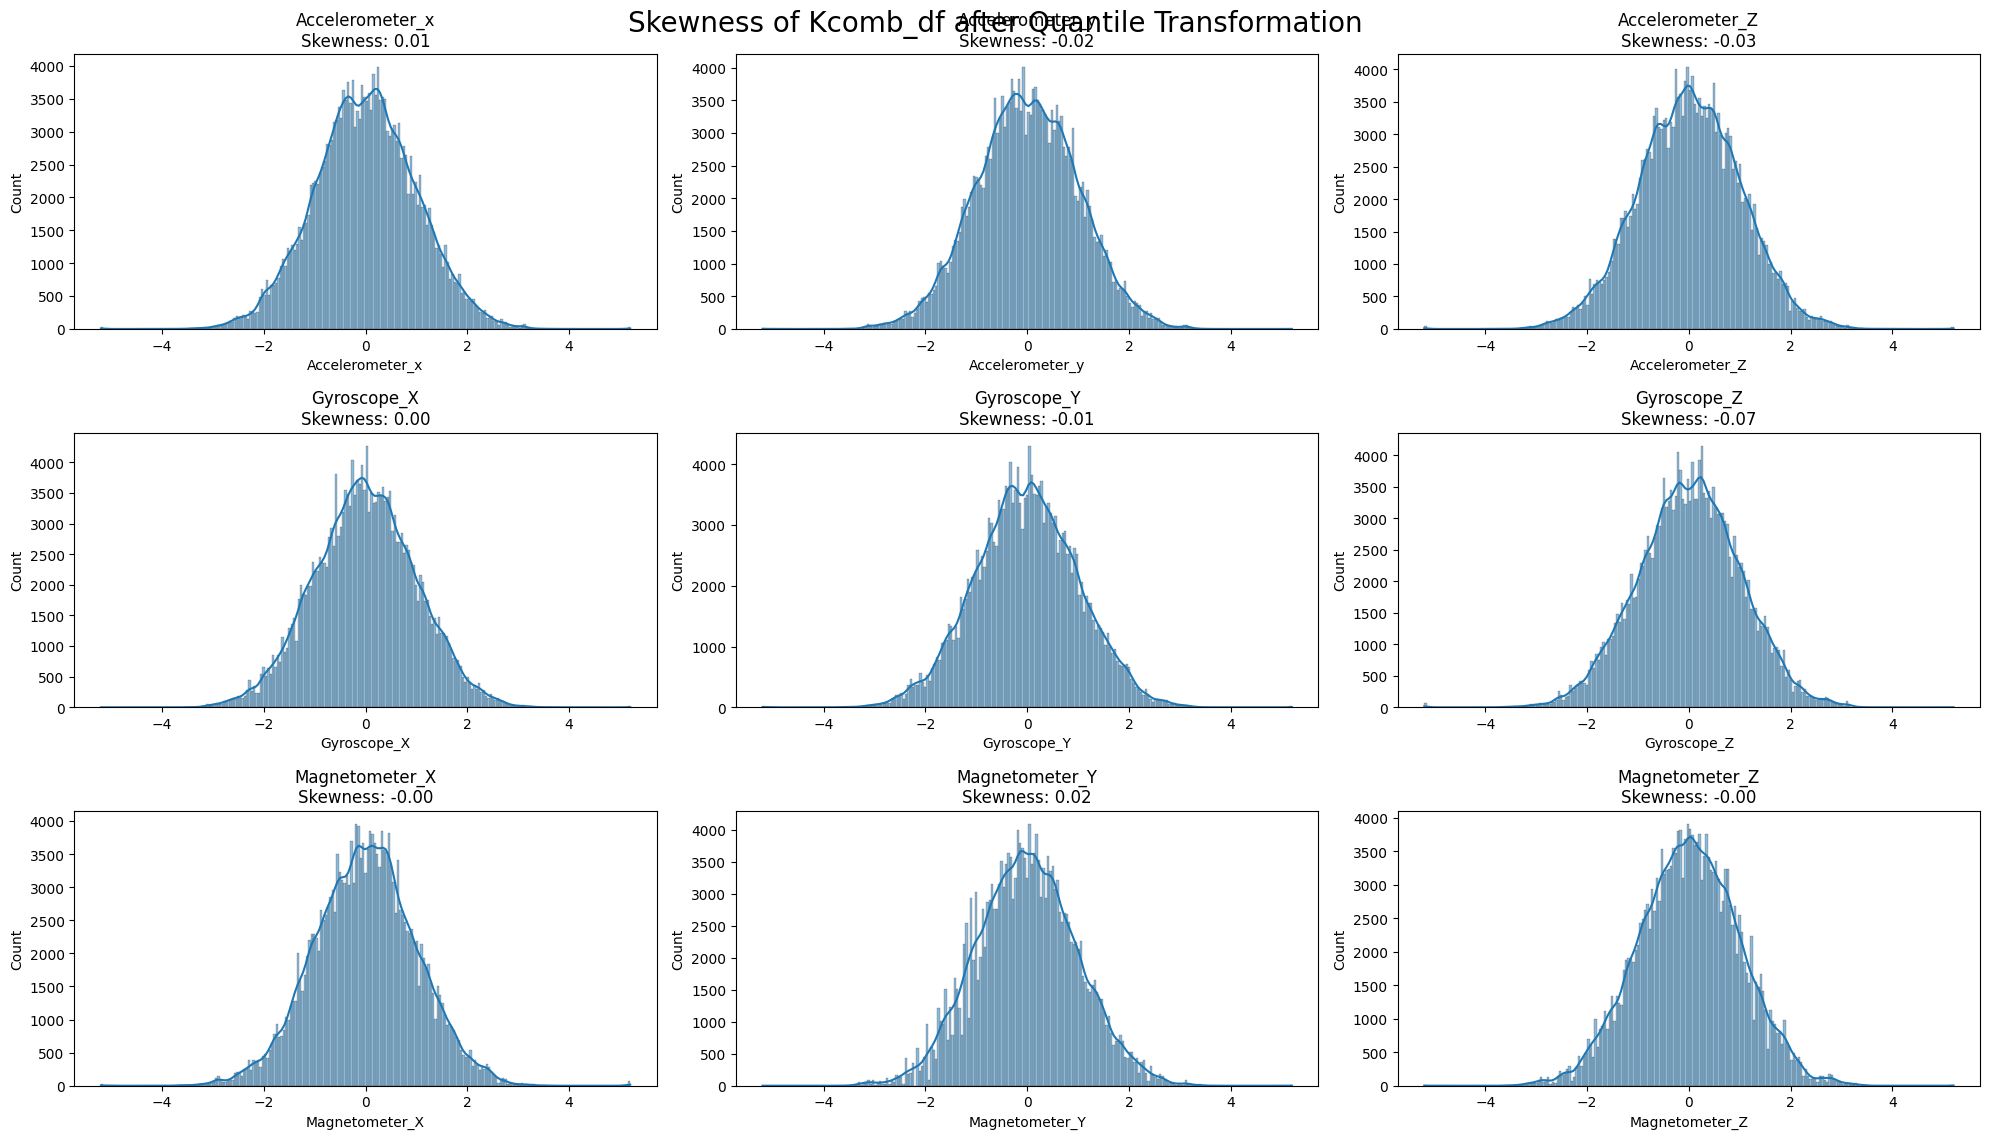

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Function to visualize skewness
def visualize_skewness(df, title):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'{column}\nSkewness: {skew(df[column]):.2f}')
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Visualize skewness for Vcomb_df and Kcomb_df after Quantile Transformation
visualize_skewness(Vcomb_df_quantile, 'Skewness of Vcomb_df after Quantile Transformation')
visualize_skewness(Kcomb_df_quantile, 'Skewness of Kcomb_df after Quantile Transformation')


In [ ]:
#  skewness value for each column in the dataframe

def calculate_final_skewness(df):
  skewness_values = {}
  for column in df.columns:
    skewness_values[column] = skew(df[column])
  return skewness_values

# Calculate final skewness for Vcomb_df_quantile
Vcomb_df_quantile_skewness = calculate_final_skewness(Vcomb_df_quantile)

# Calculate final skewness for Kcomb_df_quantile
Kcomb_df_quantile_skewness = calculate_final_skewness(Kcomb_df_quantile)

# Print final skewness values
print("Final Skewness for Vcomb_df_quantile:")
for column, skewness in Vcomb_df_quantile_skewness.items():
  print(f"{column}: {skewness}")

print("\nFinal Skewness for Kcomb_df_quantile:")
for column, skewness in Kcomb_df_quantile_skewness.items():
  print(f"{column}: {skewness}")


Final Skewness for Vcomb_df_quantile:
Accelerometer_x: -0.006017598294794837
Accelerometer_y: -0.028862849061899145
Accelerometer_Z: 0.003972951160871938
Gyroscope_X: -0.042269581693204876
Gyroscope_Y: -0.02355603116344466
Gyroscope_Z: 0.02392619303574754
Magnetometer_X: 0.029155120828263735
Magnetometer_Y: -0.012030737970324668
Magnetometer_Z: -0.028283232072453732

Final Skewness for Kcomb_df_quantile:
Accelerometer_x: 0.007573556014145568
Accelerometer_y: -0.02332325693275904
Accelerometer_Z: -0.02815196470366926
Gyroscope_X: 0.0033523429837661886
Gyroscope_Y: -0.0082461168806471
Gyroscope_Z: -0.0674608642309242
Magnetometer_X: -0.0020949437252999253
Magnetometer_Y: 0.021932255853082984
Magnetometer_Z: -0.002850311057271043


# Correlation

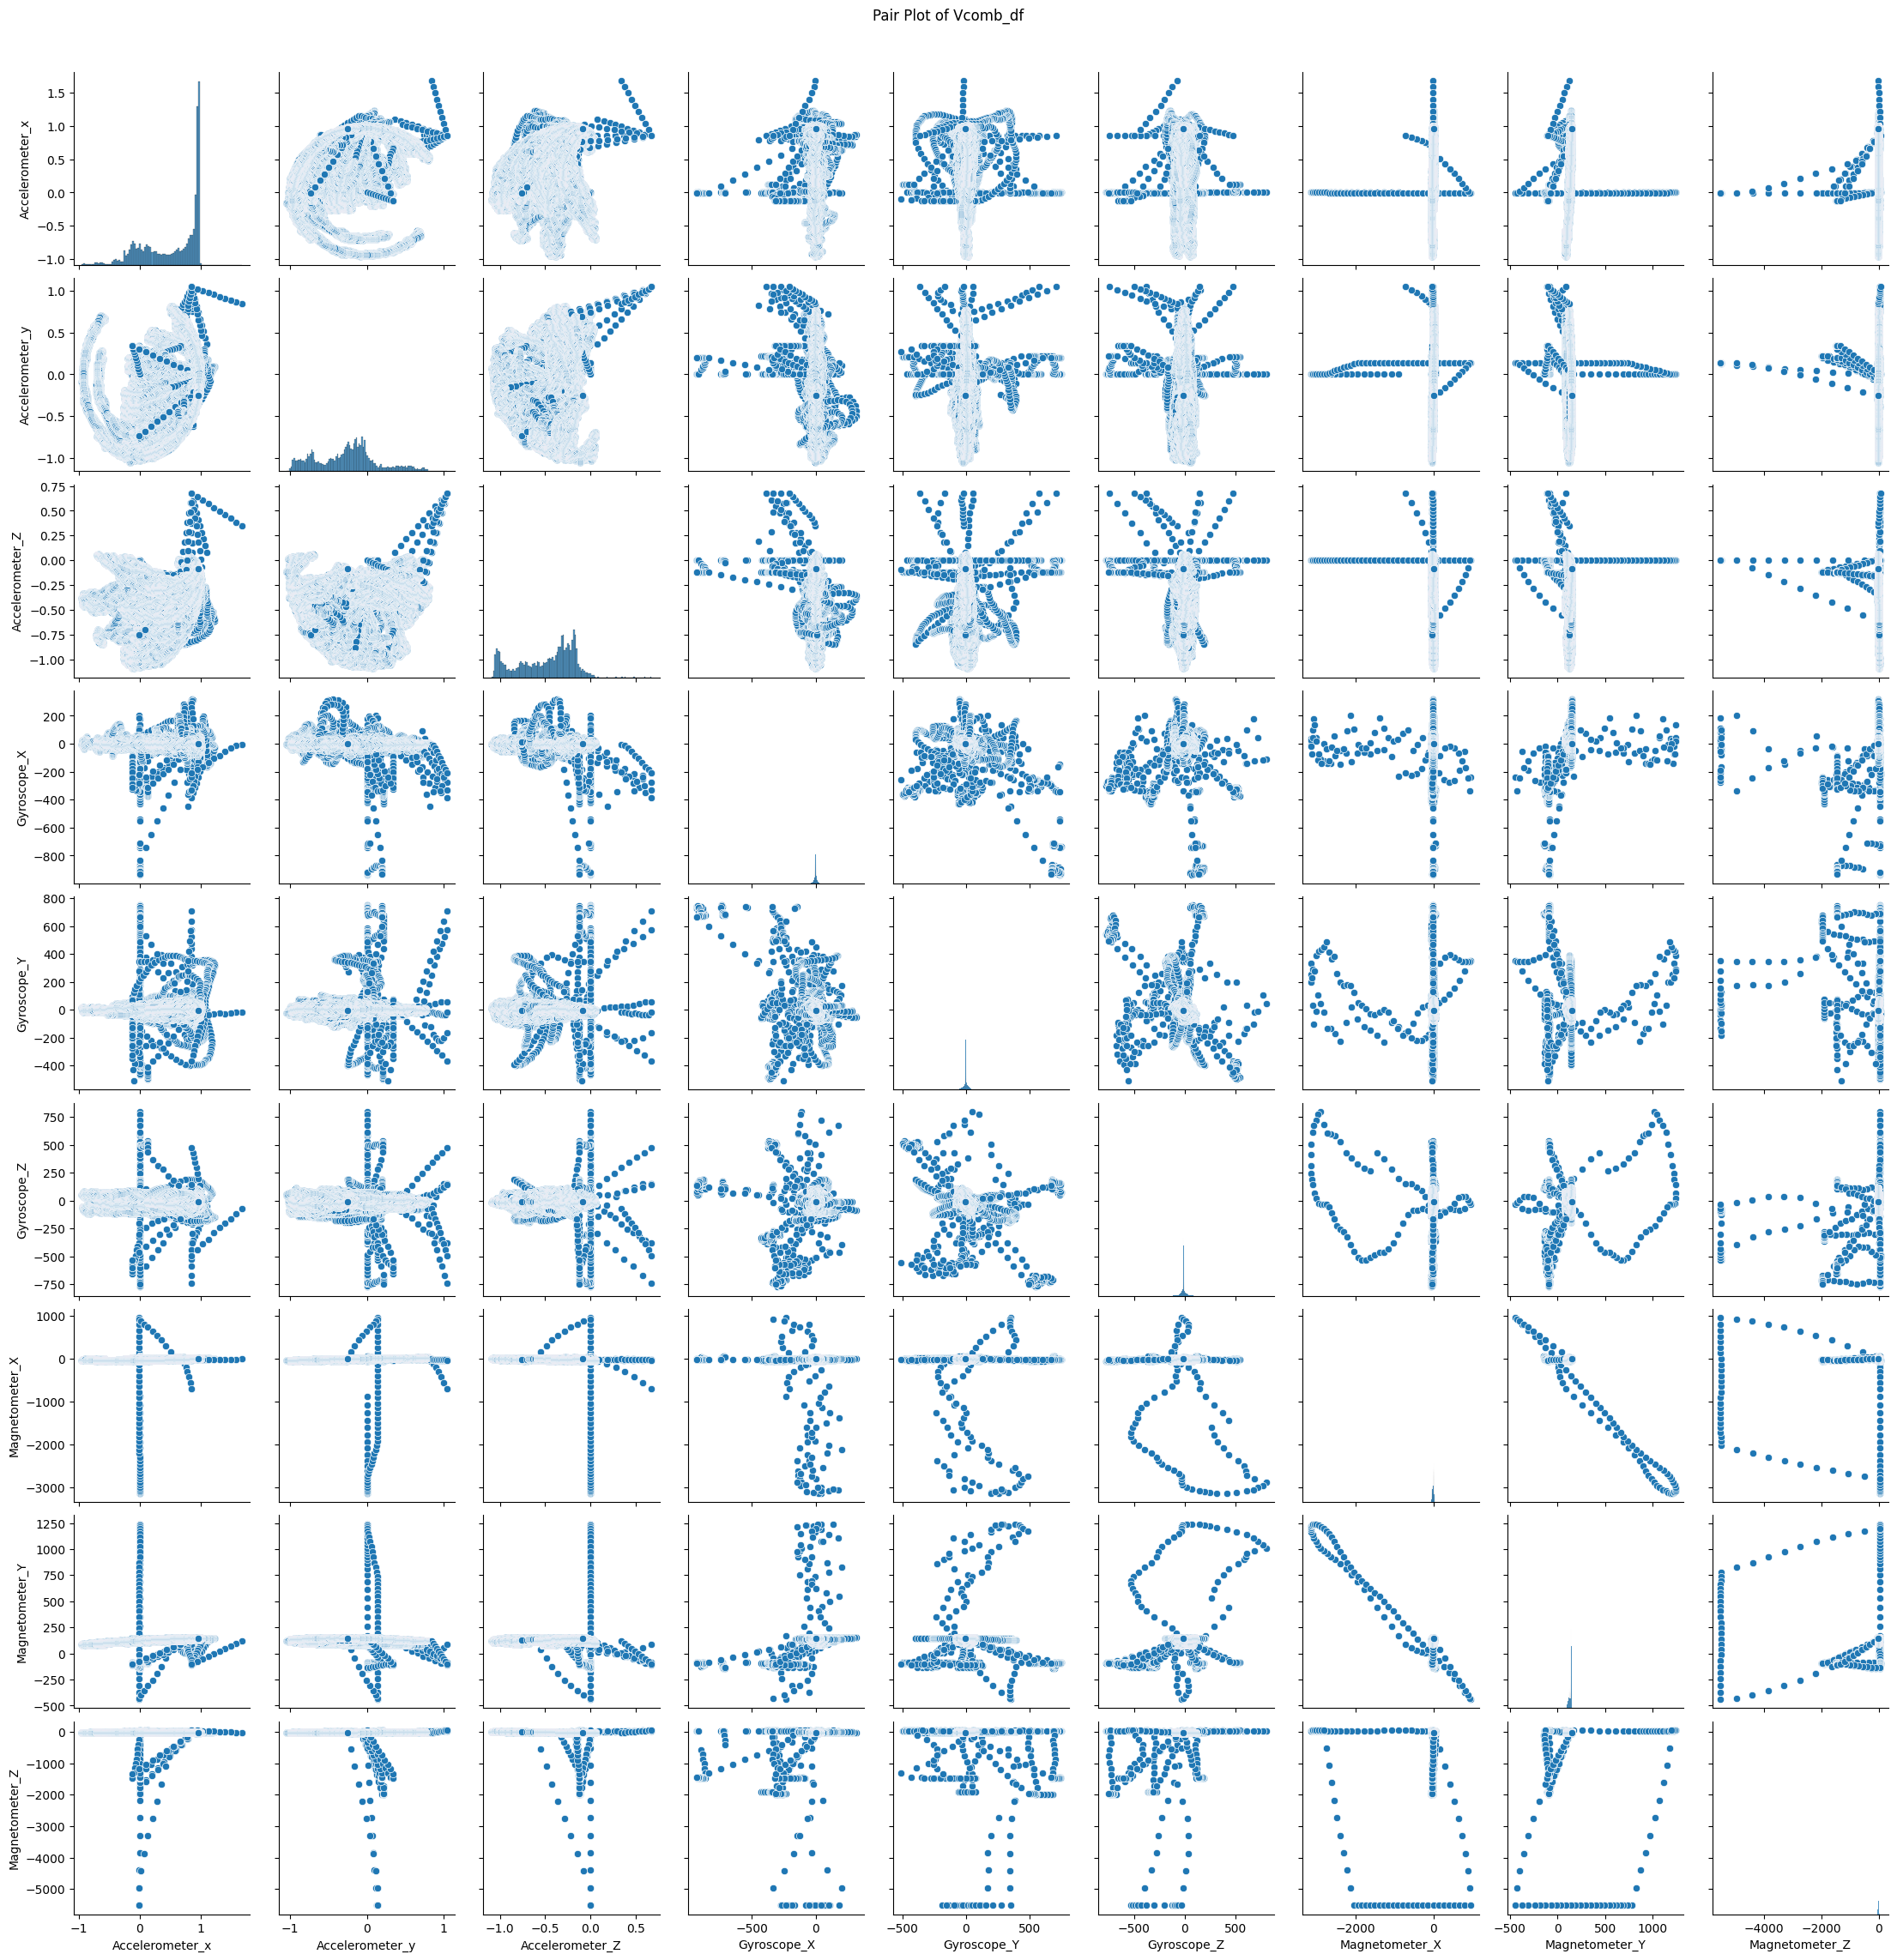

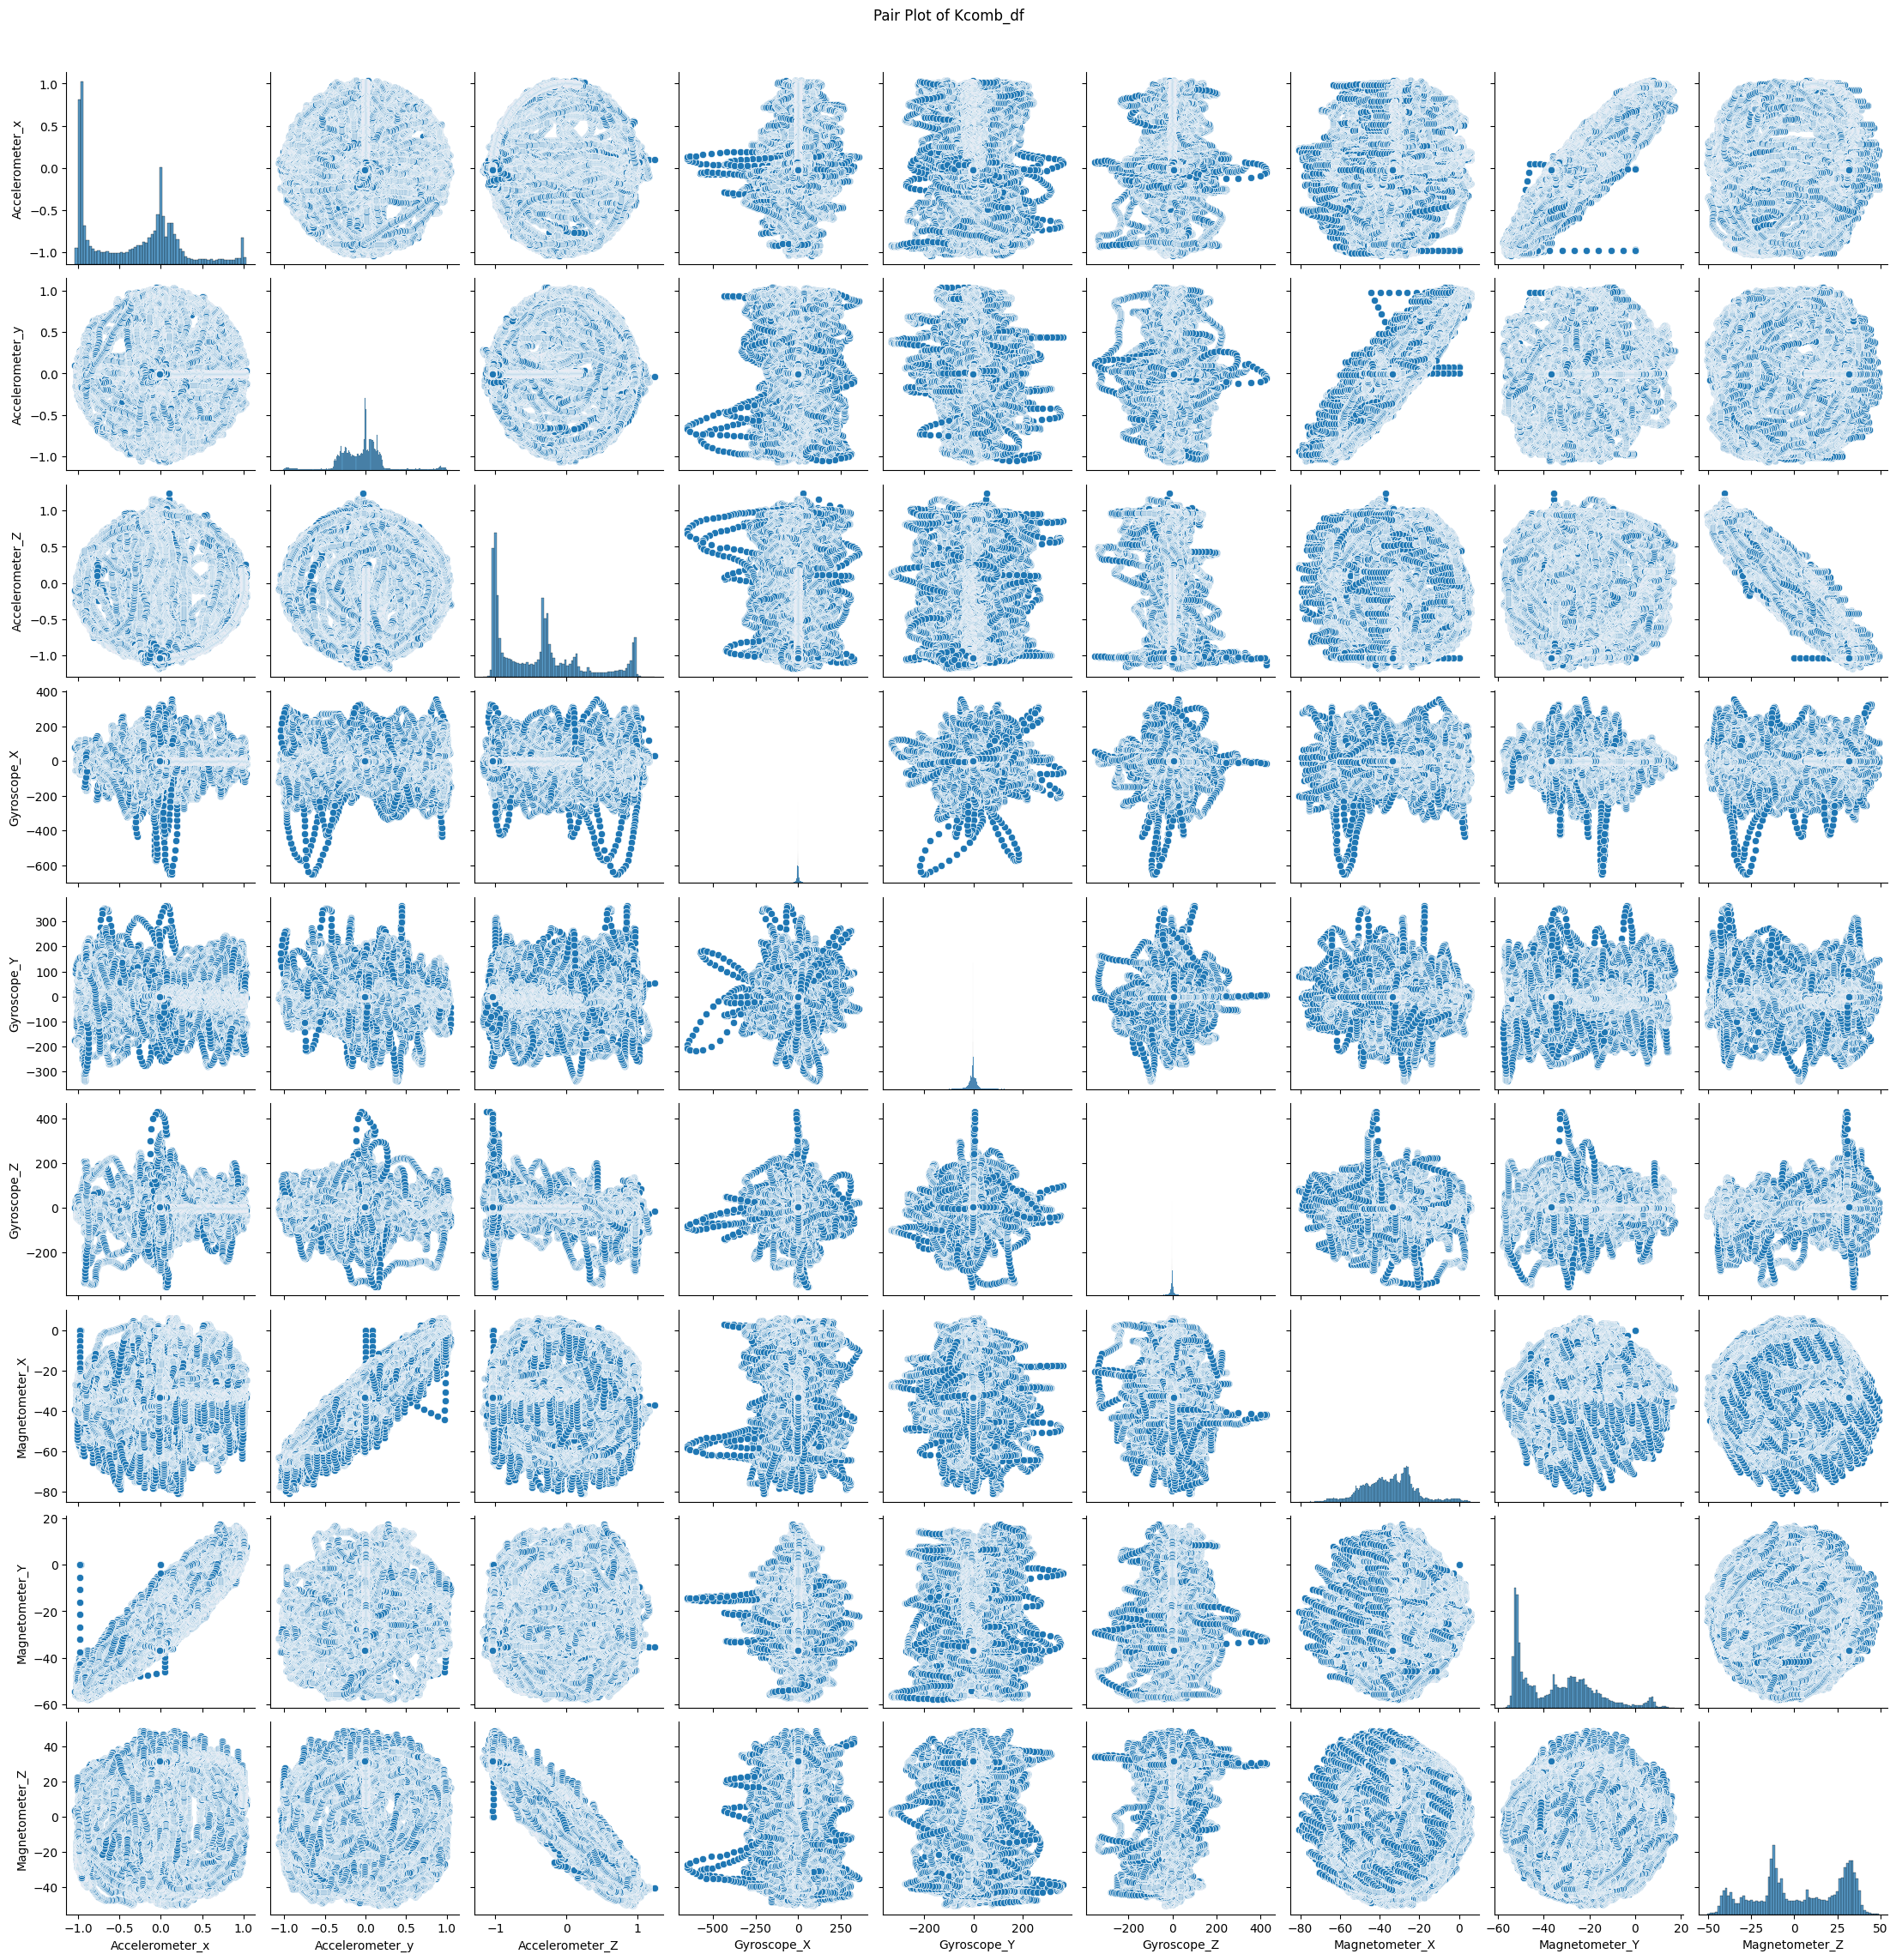

In [ ]:
# Pair plot for Vcomb_df
sns.pairplot(Vcomb_df)
plt.suptitle("Pair Plot of Vcomb_df", y=1.02)
plt.show()

# Pair plot for Kcomb_df
sns.pairplot(Kcomb_df)
plt.suptitle("Pair Plot of Kcomb_df", y=1.02)
plt.show()

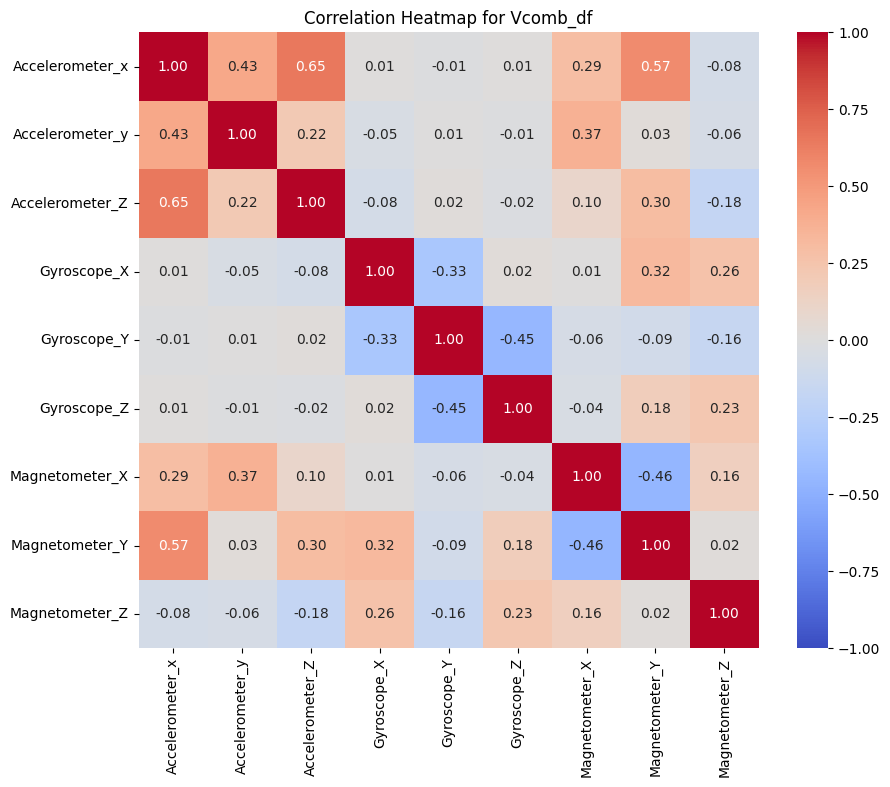

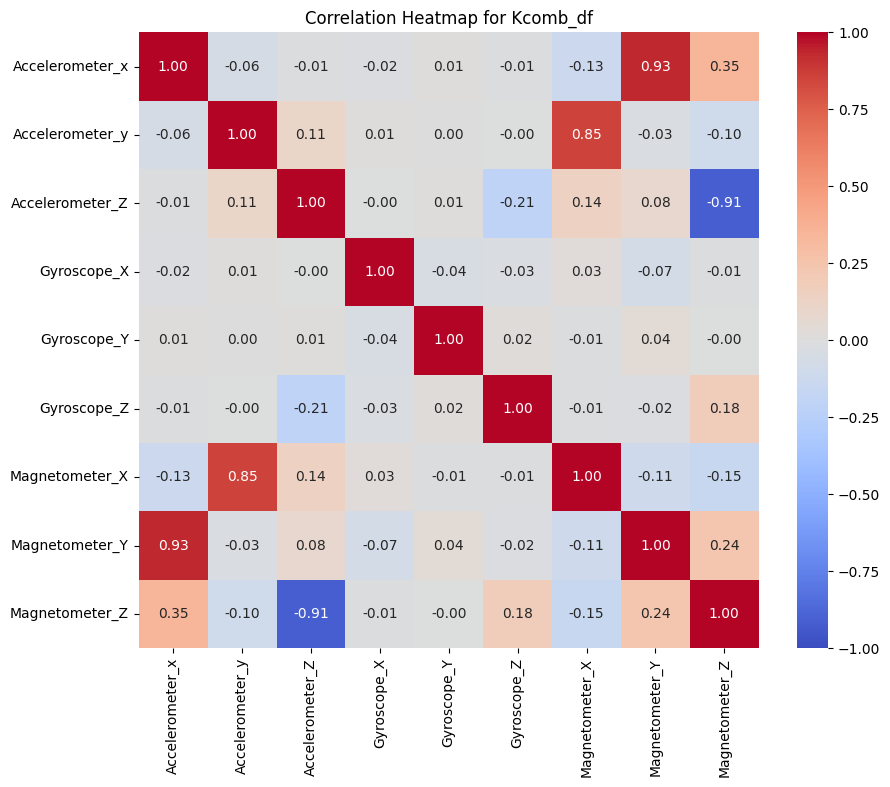

In [ ]:


# Calculate the correlation matrix for Vcomb_df
Vcomb_corr = Vcomb_df.corr()

# Calculate the correlation matrix for Kcomb_df
Kcomb_corr = Kcomb_df.corr()

# Plot heatmap for Vcomb_df
plt.figure(figsize=(10, 8))
sns.heatmap(Vcomb_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Vcomb_df')
plt.show()

# Plot heatmap for Kcomb_df
plt.figure(figsize=(10, 8))
sns.heatmap(Kcomb_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Kcomb_df')
plt.show()


In [ ]:
# Calculate variance for each column in Vcomb_df
Vcomb_variance = Vcomb_df.var()
print("Variance for each column in Vcomb_df:")
print(Vcomb_variance)

# Calculate variance for each column in Kcomb_df
Kcomb_variance = Kcomb_df.var()
print("\nVariance for each column in Kcomb_df:")
print(Kcomb_variance)


Variance for each column in Vcomb_df:
Accelerometer_x       0.217184
Accelerometer_y       0.156324
Accelerometer_Z       0.088905
Gyroscope_X         571.034701
Gyroscope_Y         871.590957
Gyroscope_Z        1067.777108
Magnetometer_X     1886.366614
Magnetometer_Y      481.427497
Magnetometer_Z     7028.056837
dtype: float64

Variance for each column in Kcomb_df:
Accelerometer_x       0.310375
Accelerometer_y       0.106083
Accelerometer_Z       0.372940
Gyroscope_X        2026.627715
Gyroscope_Y        1279.832019
Gyroscope_Z        1081.169030
Magnetometer_X      172.544943
Magnetometer_Y      275.650625
Magnetometer_Z      631.773106
dtype: float64


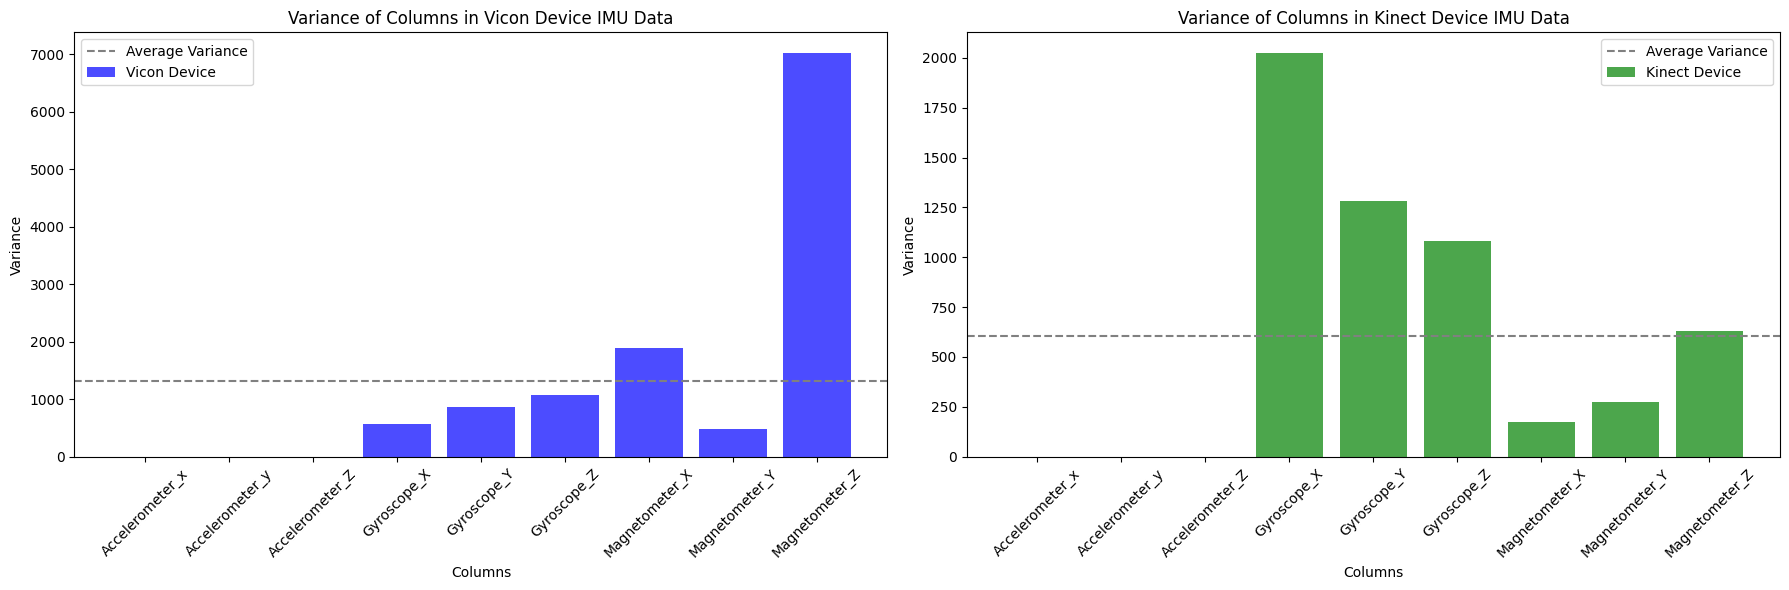

In [ ]:
import matplotlib.pyplot as plt

# Calculate variance for each column in Vcomb_df and Kcomb_df
Vcomb_variance = Vcomb_df.var()
Kcomb_variance = Kcomb_df.var()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting variance for Vcomb_df
axes[0].bar(Vcomb_variance.index, Vcomb_variance.values, color='blue', alpha=0.7, label='Vicon Device')
axes[0].axhline(y=Vcomb_variance.mean(), color='gray', linestyle='--', label='Average Variance')
axes[0].set_title('Variance of Columns in Vicon Device IMU Data')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Variance')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Plotting variance for Kcomb_df
axes[1].bar(Kcomb_variance.index, Kcomb_variance.values, color='green', alpha=0.7, label='Kinect Device')
axes[1].axhline(y=Kcomb_variance.mean(), color='gray', linestyle='--', label='Average Variance')
axes[1].set_title('Variance of Columns in Kinect Device IMU Data')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Variance')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate variance for each column in Vcomb_df and Kcomb_df
Vcomb_variance = Vcomb_df.var()
Kcomb_variance = Kcomb_df.var()

# Identify columns with lowest variance
low_variance_columns_Vcomb = Vcomb_variance.sort_values().index[:3]  # Adjust number as needed
low_variance_columns_Kcomb = Kcomb_variance.sort_values().index[:3]  # Adjust number as needed

print("Low Variance Columns in Vcomb_df:")
print(low_variance_columns_Vcomb)

print("\nLow Variance Columns in Kcomb_df:")
print(low_variance_columns_Kcomb)


Low Variance Columns in Vcomb_df:
Index(['Accelerometer_Z', 'Accelerometer_y', 'Accelerometer_x'], dtype='object')

Low Variance Columns in Kcomb_df:
Index(['Accelerometer_y', 'Accelerometer_x', 'Accelerometer_Z'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume Vcomb_df and Kcomb_df are your dataframes

# Function to remove columns based on variance threshold
def remove_low_variance_columns(df, variance_threshold=0.5):
    # Calculate variance of each column
    variances = df.var()
    # Get columns with variance below threshold
    low_variance_columns = variances[variances < variance_threshold].index.tolist()
    # Drop columns from dataframe
    df_reduced = df.drop(columns=low_variance_columns)
    return df_reduced

# Function to apply PCA and return transformed dataframe
def apply_pca(df, n_components=None):
    # Standardize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    # Apply PCA
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(df_scaled)

    # Convert PCA results back to DataFrame
    df_pca = pd.DataFrame(df_pca, columns=[f'PCA_Component_{i+1}' for i in range(df_pca.shape[1])])

    return df_pca

# Apply PCA and remove low variance columns for Vcomb_df
Vcomb_df_pca = apply_pca(Vcomb_df)
Vcomb_df_reduced = remove_low_variance_columns(Vcomb_df_pca)

# Apply PCA and remove low variance columns for Kcomb_df
Kcomb_df_pca = apply_pca(Kcomb_df)
Kcomb_df_reduced = remove_low_variance_columns(Kcomb_df_pca)

# Print the reduced DataFrames
print("Reduced DataFrame after PCA and removing low variance columns for Vcomb_df:")
print(Vcomb_df_reduced.head())

print("\nReduced DataFrame after PCA and removing low variance columns for Kcomb_df:")
print(Kcomb_df_reduced.head())


Reduced DataFrame after PCA and removing low variance columns for Vcomb_df:
   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0         0.510118        -0.236300         0.026142        -0.370834   
1         0.457363        -0.255473         0.031919        -0.418064   
2         0.402497        -0.263456         0.039502        -0.454286   
3         0.346276        -0.264731         0.045831        -0.475236   
4         0.288348        -0.257616         0.049150        -0.476437   

   PCA_Component_5  PCA_Component_6  
0        -0.113488         0.095563  
1        -0.088699         0.091935  
2        -0.075591         0.093561  
3        -0.072088         0.102466  
4        -0.075823         0.118823  

Reduced DataFrame after PCA and removing low variance columns for Kcomb_df:
   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0         1.084437        -0.868021        -0.434339         0.034574   
1         1.135391        -0.86466

High Correlation Filter

Top 5 highly correlated columns in Vcomb_df:
 Accelerometer_Z  Accelerometer_x    0.649814
Magnetometer_Y   Accelerometer_x    0.567240
                 Magnetometer_X     0.455867
Gyroscope_Z      Gyroscope_Y        0.447758
Accelerometer_y  Accelerometer_x    0.429650
dtype: float64


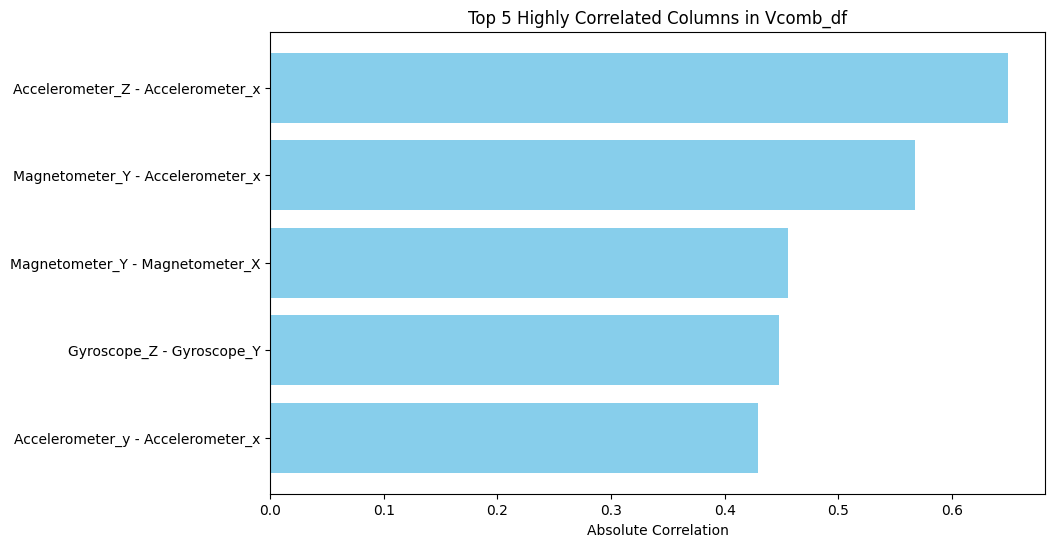

Top 5 highly correlated columns in Kcomb_df:
 Magnetometer_Y  Accelerometer_x    0.932058
Magnetometer_Z  Accelerometer_Z    0.914131
Magnetometer_X  Accelerometer_y    0.852155
Magnetometer_Z  Accelerometer_x    0.345183
                Magnetometer_Y     0.241772
dtype: float64


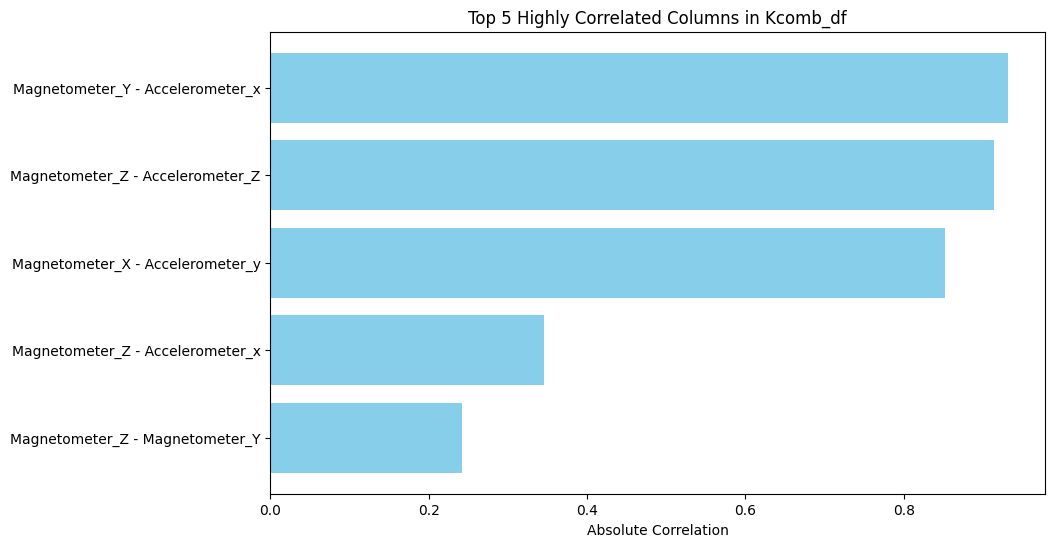

In [ ]:


def get_top_correlations(df, n=5):

    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    top_correlations = upper.unstack().sort_values(ascending=False).dropna().head(n)
    return top_correlations

def plot_top_correlations_bar(df, top_correlations, title):

    top_correlations_values = top_correlations.values
    top_correlations.index = [f'{pair[0]} - {pair[1]}' for pair in top_correlations.index]

    plt.figure(figsize=(10, 6))
    plt.barh(top_correlations.index, top_correlations_values, color='skyblue')
    plt.xlabel('Absolute Correlation')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to show highest correlation at the top
    plt.show()


# Get top 5 highly correlated columns for Vcomb_df
top_corr_Vcomb = get_top_correlations(Vcomb_df, n=5)
print("Top 5 highly correlated columns in Vcomb_df:\n", top_corr_Vcomb)

# Plot bar plot for Vcomb_df
plot_top_correlations_bar(Vcomb_df, top_corr_Vcomb, 'Top 5 Highly Correlated Columns in Vcomb_df')

# Get top 5 highly correlated columns for Kcomb_df
top_corr_Kcomb = get_top_correlations(Kcomb_df, n=5)
print("Top 5 highly correlated columns in Kcomb_df:\n", top_corr_Kcomb)

# Plot bar plot for Kcomb_df
plot_top_correlations_bar(Kcomb_df, top_corr_Kcomb, 'Top 5 Highly Correlated Columns in Kcomb_df')


In [ ]:
def high_correlation_filter(df, threshold=0.8):

    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a boolean mask for the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with a correlation greater than the threshold
    high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop highly correlated features
    filtered_df = df.drop(columns=high_corr_features)

    return filtered_df, high_corr_features


# Apply the high correlation filter to Vcomb_df with a threshold of 0.8
filtered_Vcomb_df, removed_features_Vcomb = high_correlation_filter(Vcomb_df, threshold=0.5)
print("Vcomb_df - Removed high correlation features:", removed_features_Vcomb)
print("\nVcomb_df - Filtered DataFrame:\n", filtered_Vcomb_df)

# Apply the high correlation filter to Kcomb_df with a threshold of 0.8
filtered_Kcomb_df, removed_features_Kcomb = high_correlation_filter(Kcomb_df, threshold=0.8)
print("Kcomb_df - Removed high correlation features:", removed_features_Kcomb)
print("\nKcomb_df - Filtered DataFrame:\n", filtered_Kcomb_df)


Vcomb_df - Removed high correlation features: ['Accelerometer_Z', 'Magnetometer_Y']

Vcomb_df - Filtered DataFrame:
         Accelerometer_x  Accelerometer_y  Gyroscope_X  Gyroscope_Y  \
0              0.820996        -0.261035     6.613159     3.369141   
1              0.808008        -0.272363     7.409668     2.947998   
2              0.794971        -0.282764     7.763672     2.780151   
3              0.783350        -0.291846     7.644653     2.664185   
4              0.772168        -0.298584     6.878662     2.377319   
...                 ...              ...          ...          ...   
187961         0.957520        -0.252686    -2.139282    -2.355957   
187962         0.958105        -0.252832    -1.980591    -2.523804   
187963         0.958203        -0.252637    -1.867676    -2.746582   
187964         0.957373        -0.252832    -1.785278    -2.844238   
187965         0.956641        -0.252393    -1.727295    -2.801514   

        Gyroscope_Z  Magnetometer_X  Magne

# Random Forest


In [ ]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate random data for features and target
X = pd.DataFrame(np.random.rand(100, 10))
y = np.random.randint(0, 2, size=100)

# Train the random forest classifier
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Select the top n features
n_features_to_select = 5  # Adjust this number as needed
selected_features = feature_importances['Feature'].head(n_features_to_select)

# Create a new dataframe with the selected features
X_selected = X[selected_features]

# Print the selected features
print("Selected Features:")
print(selected_features.to_list())



Selected Features:
[9, 2, 7, 4, 8]


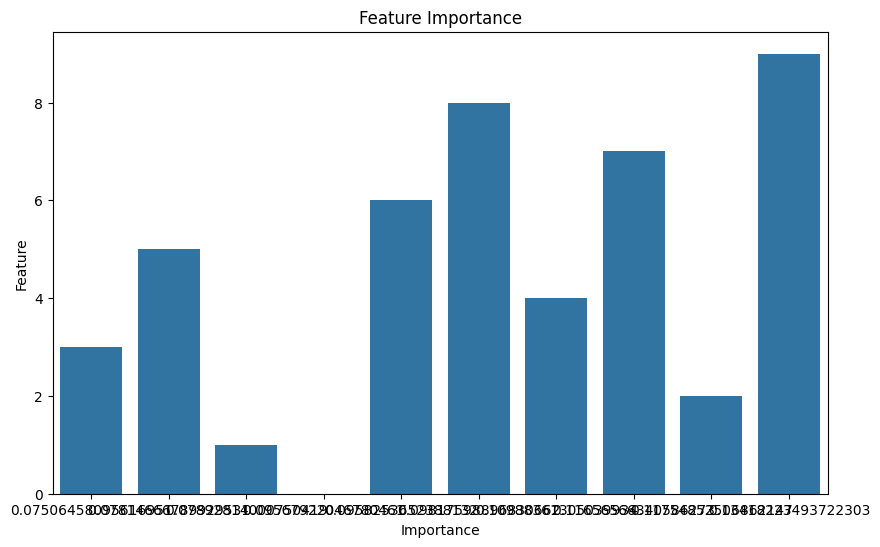

Feature 9.0 Importance: 0.13418223493722303
Feature 2.0 Importance: 0.11754852506862147
Feature 7.0 Importance: 0.11656566340586273
Feature 4.0 Importance: 0.10988361305039934
Feature 8.0 Importance: 0.09817598896830662
Feature 6.0 Importance: 0.0958253652388132
Feature 0.0 Importance: 0.09567922046780461
Feature 1.0 Importance: 0.07892814000750419
Feature 5.0 Importance: 0.07814666789929531
Feature 3.0 Importance: 0.07506458095616951


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns # Import Seaborn library
importances = rf.feature_importances_
features = X.columns

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Select the top n features
n_features_to_select = 5  # Adjust this number as needed
selected_features = feature_importances['Feature'].head(n_features_to_select)

# Create a new dataframe with the selected features
X_selected = X[selected_features]

# Plot the feature importance graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances) # Use sns for plotting
plt.title('Feature Importance') # Changed title to reflect actual feature names
plt.show()

# Display each feature importance separately. Use actual feature names (numbers)
for index, row in feature_importances.iterrows():
    print(f"Feature {row['Feature']} Importance: {row['Importance']}")

# FastICA to perform Independent Component Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


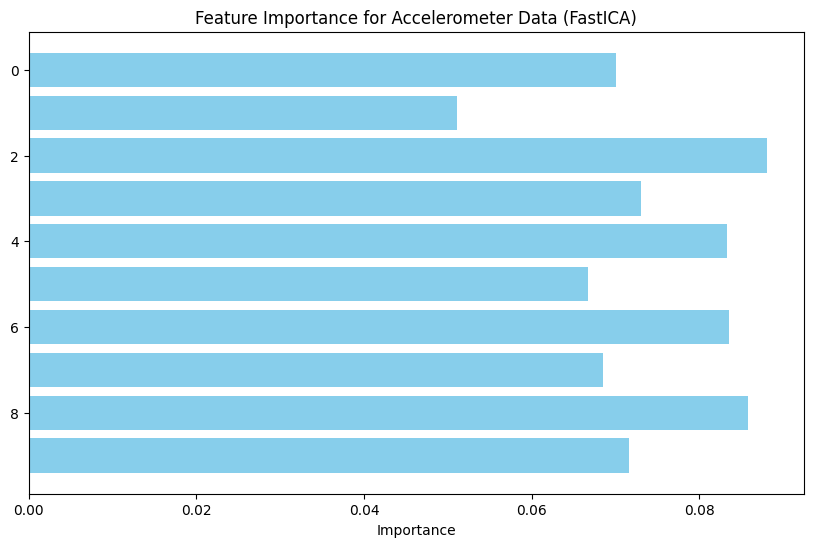

Features:
[2, 8, 6, 4, 3, 9, 0, 7, 5, 1]

Importance:
[0.08802805283453206, 0.08582710876354648, 0.08358647526843237, 0.08328752740136741, 0.07299168019547425, 0.07163436250322051, 0.07004403421459045, 0.0684650107212066, 0.06666085585538206, 0.05113646337501809]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Instantiate FastICA with desired number of components
ica = FastICA(n_components=5)

# Fit the model to the data
ica.fit(X)

# Transform the data
X_transformed = ica.transform(X)

# Get the feature importances
# Use the absolute values of the components to represent importance
importances = abs(ica.components_).mean(axis=0) # Calculate the mean importance across components

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Accelerometer Data (FastICA)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()

# Specify what is what
print("Features:")
print(feature_importances['Feature'].tolist())
print("\nImportance:")
print(feature_importances['Importance'].tolist())

# Explain what each feature represents based on its position in the list

# Forward feature selection

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'Magnetometer_Z' is the target variable in both dataframes
target_column = 'Magnetometer_Z'

# Separate features and target
X_vicon = Vcomb_df.drop(columns=[target_column])
y_vicon = Vcomb_df[target_column]

X_kinect = Kcomb_df.drop(columns=[target_column])
y_kinect = Kcomb_df[target_column]

# Initialize model
model = LinearRegression()

# Function to evaluate model performance (accuracy in this case)
def evaluate_performance(X, y, selected_features):
    model.fit(X[selected_features], y)
    y_pred = model.predict(X[selected_features])
    accuracy = r2_score(y, y_pred)
    return accuracy

# Function to print accuracy
def print_accuracy(X, y, selected_features):
    accuracy = evaluate_performance(X, y, selected_features)
    formatted_accuracy = "{:.4f}".format(accuracy)
    print(f"Accuracy (R-squared) with features {selected_features}: {formatted_accuracy}")

# Function to print initial accuracy
def print_initial_accuracy(X, y):
    accuracy = evaluate_performance(X, y, X.columns)
    formatted_accuracy = "{:.4f}".format(accuracy)
    print(f"Initial Accuracy (R-squared) with all features: {formatted_accuracy}")
    print("-" * 50)

# Print initial accuracies
print("Before Feature Selection:")
print_initial_accuracy(X_vicon, y_vicon)
print_initial_accuracy(X_kinect, y_kinect)

# Initialize sets to store results for selected features (using set to avoid duplicates)
selected_features_vicon = set()
selected_features_kinect = set()

# Forward feature selection for Vicon data
for feature in X_vicon.columns:
    selected_features_vicon.add(feature)
    print(f"Selected Features for Vicon: {list(selected_features_vicon)}")
    print_accuracy(X_vicon, y_vicon, list(selected_features_vicon))
    print("-" * 50)

# Forward feature selection for Kinect data
for feature in X_kinect.columns:
    selected_features_kinect.add(feature)
    print(f"Selected Features for Kinect: {list(selected_features_kinect)}")
    print_accuracy(X_kinect, y_kinect, list(selected_features_kinect))
    print("-" * 50)

Before Feature Selection:
Initial Accuracy (R-squared) with all features: 0.2094
--------------------------------------------------
Initial Accuracy (R-squared) with all features: 0.9492
--------------------------------------------------
Selected Features for Vicon: ['Accelerometer_x']
Accuracy (R-squared) with features ['Accelerometer_x']: 0.0057
--------------------------------------------------
Selected Features for Vicon: ['Accelerometer_y', 'Accelerometer_x']
Accuracy (R-squared) with features ['Accelerometer_y', 'Accelerometer_x']: 0.0068
--------------------------------------------------
Selected Features for Vicon: ['Accelerometer_Z', 'Accelerometer_y', 'Accelerometer_x']
Accuracy (R-squared) with features ['Accelerometer_Z', 'Accelerometer_y', 'Accelerometer_x']: 0.0375
--------------------------------------------------
Selected Features for Vicon: ['Accelerometer_Z', 'Gyroscope_X', 'Accelerometer_y', 'Accelerometer_x']
Accuracy (R-squared) with features ['Accelerometer_Z', 'G

# Backward feature elimination

In [ ]:
# Backward feature elimination for Vicon data
remaining_features_vicon = list(X_vicon.columns)
while len(remaining_features_vicon) > 1:
    accuracies = {}
    for feature in remaining_features_vicon:
        selected_features = [f for f in remaining_features_vicon if f != feature]
        accuracy = evaluate_performance(X_vicon, y_vicon, selected_features)
        accuracies[feature] = accuracy
    least_important_feature = min(accuracies, key=accuracies.get)
    remaining_features_vicon.remove(least_important_feature)
    print(f"Removed Feature for Vicon: {least_important_feature}")
    print(f"Remaining Features for Vicon: {remaining_features_vicon}")
    print_accuracy(X_vicon, y_vicon, remaining_features_vicon)
    print("-" * 50)

# Backward feature elimination for Kinect data
remaining_features_kinect = list(X_kinect.columns)
while len(remaining_features_kinect) > 1:
    accuracies = {}
    for feature in remaining_features_kinect:
        selected_features = [f for f in remaining_features_kinect if f != feature]
        accuracy = evaluate_performance(X_kinect, y_kinect, selected_features)
        accuracies[feature] = accuracy
    least_important_feature = min(accuracies, key=accuracies.get)
    remaining_features_kinect.remove(least_important_feature)
    print(f"Removed Feature for Kinect: {least_important_feature}")
    print(f"Remaining Features for Kinect: {remaining_features_kinect}")
    print_accuracy(X_kinect, y_kinect, remaining_features_kinect)
    print("-" * 50)

Removed Feature for Vicon: Magnetometer_X
Remaining Features for Vicon: ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z', 'Magnetometer_Y']
Accuracy (R-squared) with features ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z', 'Magnetometer_Y']: 0.1574
--------------------------------------------------
Removed Feature for Vicon: Gyroscope_X
Remaining Features for Vicon: ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_Z', 'Gyroscope_Y', 'Gyroscope_Z', 'Magnetometer_Y']
Accuracy (R-squared) with features ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_Z', 'Gyroscope_Y', 'Gyroscope_Z', 'Magnetometer_Y']: 0.0920
--------------------------------------------------
Removed Feature for Vicon: Gyroscope_Z
Remaining Features for Vicon: ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_Z', 'Gyroscope_Y', 'Magnetometer_Y']
Accuracy (R-squared) with features ['Accelerometer_x', 'A

# LDA

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Import LDA

def remove_low_variance_columns(df, variance_threshold=0.5):
    # Calculate variance of each column
    variances = df.var()
    # Get columns with variance below threshold
    low_variance_columns = variances[variances < variance_threshold].index.tolist()
    # Drop columns from dataframe
    df_reduced = df.drop(columns=low_variance_columns)
    return df_reduced

def apply_lda(df):
    # Instantiate LDA
    lda = LinearDiscriminantAnalysis() # Create an instance of the LDA class

    # Fit LDA to the data and transform it
    df_lda = lda.fit_transform(df.values, [0]*len(df)) # Assuming all data belongs to class 0 for this example

    # Convert LDA results back to DataFrame
    df_lda = pd.DataFrame(df_lda)

    return df_lda

# Create sample DataFrames for demonstration - replace with your actual data
Vcomb_df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})  # Create Vcomb_df
Kcomb_df = pd.DataFrame({'C': [7, 8, 9], 'D': [10, 11, 12]}) # Create Kcomb_df

# Apply LDA and remove low variance columns for Vcomb_df
Vcomb_df_lda = apply_lda(Vcomb_df)
Vcomb_df_reduced = remove_low_variance_columns(Vcomb_df_lda)

# Apply LDA and remove low variance columns for Kcomb_df
Kcomb_df_lda = apply_lda(Kcomb_df)
Kcomb_df_reduced = remove_low_variance_columns(Kcomb_df_lda)

# Print the reduced DataFrames
print("Reduced DataFrame after LDA and removing low variance columns for Vcomb_df:")
print(Vcomb_df_reduced.head())

print("\nReduced DataFrame after LDA and removing low variance columns for Kcomb_df:")
print(Kcomb_df_reduced.head())

Reduced DataFrame after LDA and removing low variance columns for Vcomb_df:
Empty DataFrame
Columns: []
Index: [0, 1, 2]

Reduced DataFrame after LDA and removing low variance columns for Kcomb_df:
Empty DataFrame
Columns: []
Index: [0, 1, 2]


Factor Analysis

Shape of Vcomb_df: (3, 2)
Shape of Kcomb_df: (3, 2)
Factor Loadings for Vcomb_df:
     Factor1  Factor2
A  0.866025     -0.0
B  0.866025      0.0


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_factor_analysis.py:283: RuntimeWarning: divide by zero encountered in log
  ll = llconst + np.sum(np.log(s))


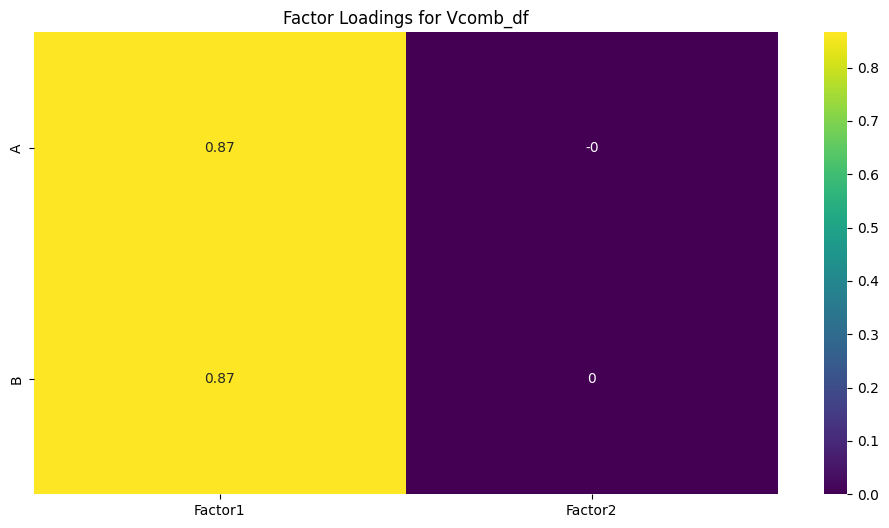

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_factor_analysis.py:283: RuntimeWarning: divide by zero encountered in log
  ll = llconst + np.sum(np.log(s))


Factor Loadings for Kcomb_df:
     Factor1  Factor2
C  0.866025     -0.0
D  0.866025      0.0


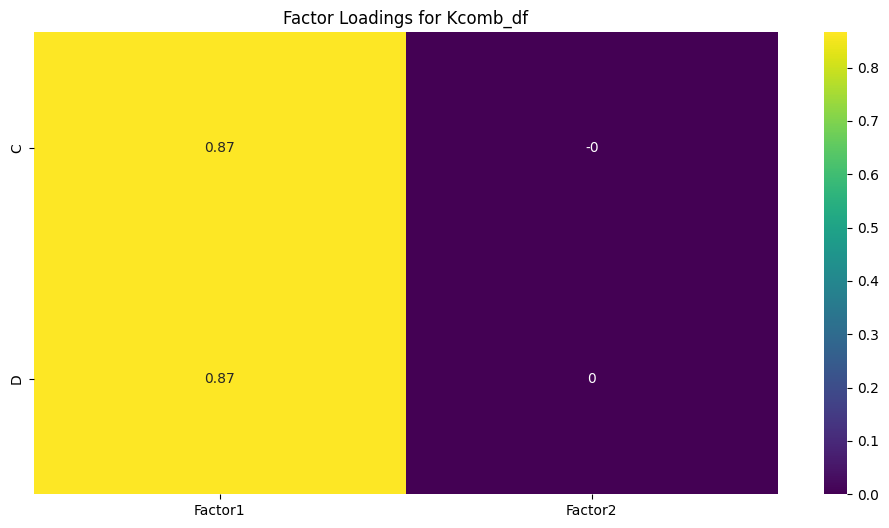

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def perform_factor_analysis(df, n_factors):
    # Standardize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    # Perform Factor Analysis
    fa = FactorAnalysis(n_components=n_factors, random_state=42)
    fa.fit(df_scaled)

    # Create a DataFrame for factor loadings
    loadings_df = pd.DataFrame(fa.components_.T, index=df.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])

    return fa, loadings_df

def plot_factor_loadings(loadings_df, title):
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(loadings_df, annot=True, cmap='viridis')
    plt.title(title)
    plt.show()

# Check the shape of the dataframes to determine the number of factors
print("Shape of Vcomb_df:", Vcomb_df.shape)
print("Shape of Kcomb_df:", Kcomb_df.shape)

# Set the number of factors (must be less than or equal to the number of columns)
n_factors_Vcomb = min(3, Vcomb_df.shape[1])
n_factors_Kcomb = min(3, Kcomb_df.shape[1])

# Perform Factor Analysis on Vcomb_df
fa_Vcomb, loadings_Vcomb = perform_factor_analysis(Vcomb_df, n_factors=n_factors_Vcomb)
print("Factor Loadings for Vcomb_df:\n", loadings_Vcomb)

# Plot Factor Loadings for Vcomb_df
plot_factor_loadings(loadings_Vcomb, 'Factor Loadings for Vcomb_df')

# Perform Factor Analysis on Kcomb_df
fa_Kcomb, loadings_Kcomb = perform_factor_analysis(Kcomb_df, n_factors=n_factors_Kcomb)
print("Factor Loadings for Kcomb_df:\n", loadings_Kcomb)

# Plot Factor Loadings for Kcomb_df
plot_factor_loadings(loadings_Kcomb, 'Factor Loadings for Kcomb_df')


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_factor_analysis.py:283: RuntimeWarning: divide by zero encountered in log
  ll = llconst + np.sum(np.log(s))


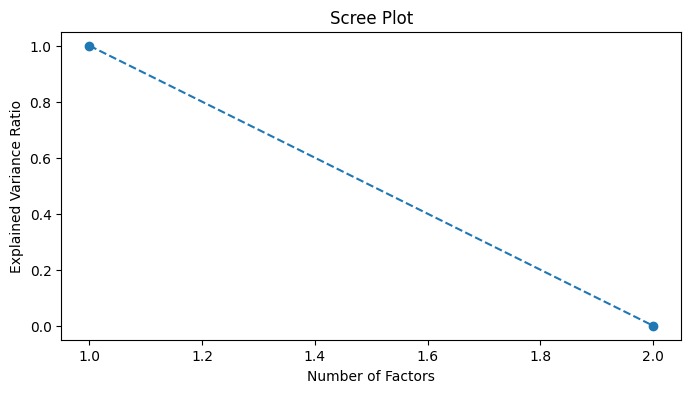

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_factor_analysis.py:283: RuntimeWarning: divide by zero encountered in log
  ll = llconst + np.sum(np.log(s))


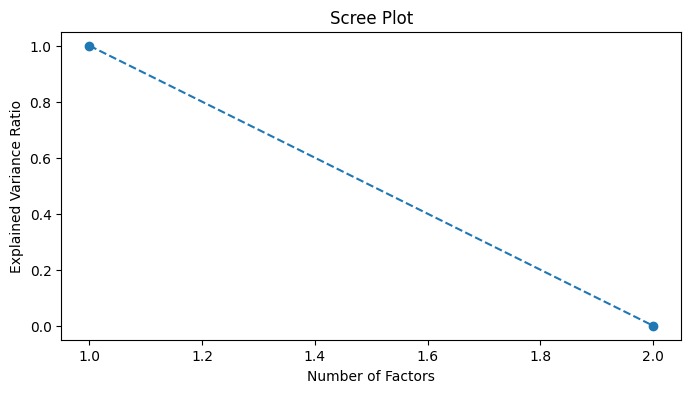

In [ ]:
def plot_scree_plot(df):

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    fa = FactorAnalysis(random_state=42)
    fa.fit(df_scaled)

    ev = np.var(fa.transform(df_scaled), axis=0)
    ev_ratio = ev / np.sum(ev)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(ev_ratio) + 1), ev_ratio, marker='o', linestyle='--')
    plt.xlabel('Number of Factors')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.show()

# Plot scree plots for Vcomb_df and Kcomb_df
plot_scree_plot(Vcomb_df)
plot_scree_plot(Kcomb_df)
